<a href="https://colab.research.google.com/github/ZaUt-bio/PD-Rigidity-Analysis/blob/main/Rigidity_Weak_Supervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install snorkel
!pip install matplotlib  # Snorkel requires matplotlib
import numpy as np
import pandas as pd
import snorkel
from snorkel.labeling import labeling_function, PandasLFApplier
from snorkel.labeling import LFAnalysis
import os
from google.colab import drive
drive.mount('/content/drive')
from snorkel.labeling.model import LabelModel
from snorkel.labeling import filter_unlabeled_dataframe
from snorkel.utils import probs_to_preds
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 2.4 MB/s eta 0:00:00
Mounted at /content/drive


# Featuures Visualization

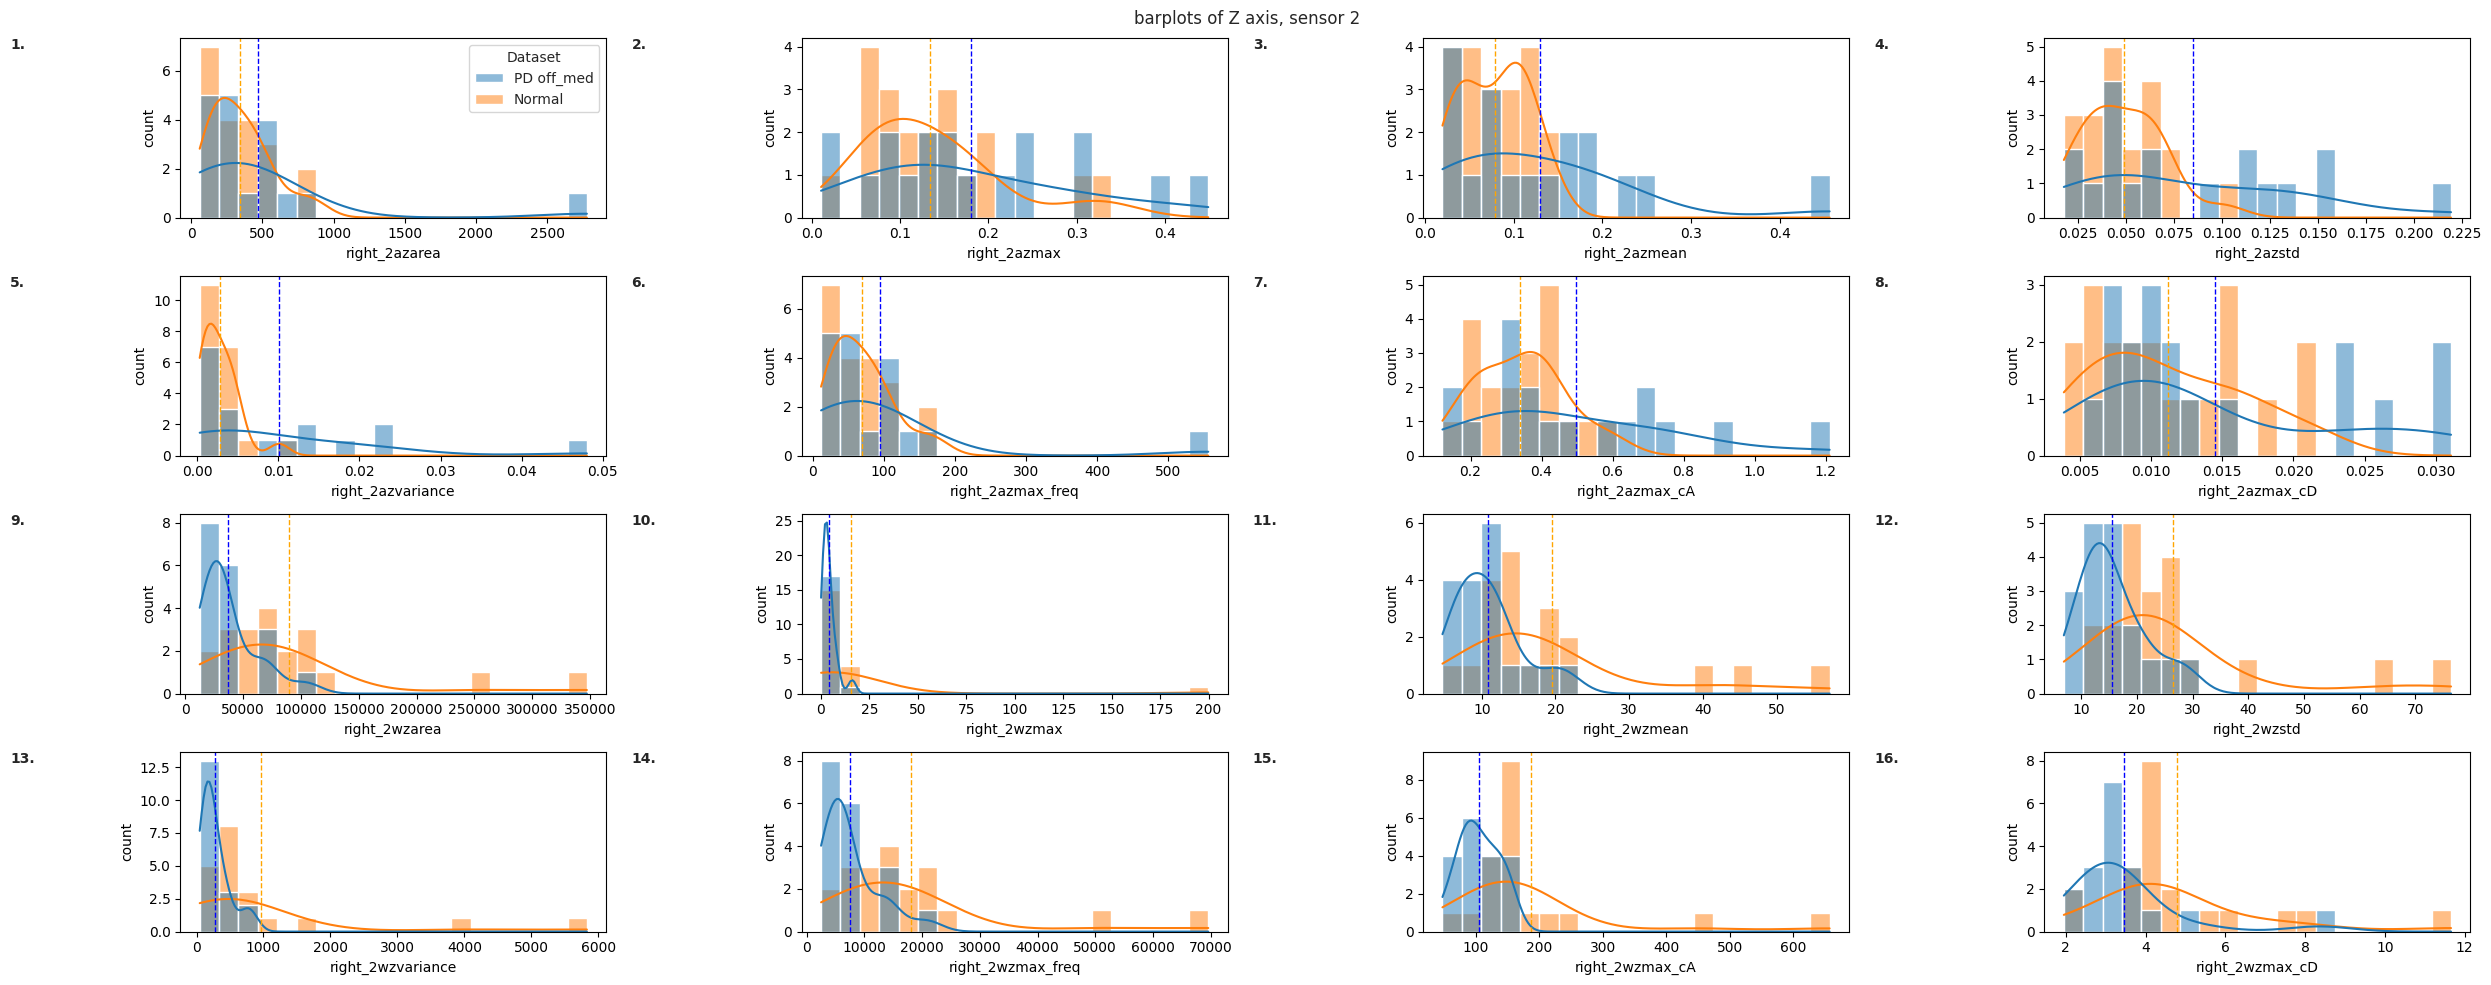

In [ ]:
# Reading features
folder_path = "/content/drive/My Drive/COLAB/Rigidity_WS/Extracted_Features_30HZ.xlsx"
df = pd.read_excel(folder_path)
df.columns=df.iloc[0]
df = df.drop(index=0)
df = df.drop(0, axis=1)
#numeric_columns = df.columns.difference(['subjects'])  # Exclude 'subjects' from conversion
#df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# reading each category
PA_Left = data_per_category(df,category='PA',LR='L')
PA_Left_Z = filter_columns_by_letter(PA_Left, letter='z', position=2)
PA_Left_Z_S2 = filter_columns_by_letter(PA_Left_Z, letter='2', position=0)
PA_Right = data_per_category(df,category='PA',LR='R')
PA_Right_Z = filter_columns_by_letter(PA_Right, letter='z', position=2)
PA_Right_Z_S2 = filter_columns_by_letter(PA_Right_Z, letter='2', position=0)
PA_Both_Z_S2 = pd.concat([PA_Left_Z_S2,PA_Right_Z_S2])

PB_Left = data_per_category(df,category='PB',LR='L')
PB_Left_Z = filter_columns_by_letter(PB_Left, letter='z', position=2)
PB_Left_Z_S2 = filter_columns_by_letter(PB_Left_Z, letter='2', position=0)
PB_Right = data_per_category(df,category='PB',LR='R')
PB_Right_Z = filter_columns_by_letter(PB_Right, letter='z', position=2)
PB_Right_Z_S2 = filter_columns_by_letter(PB_Right_Z, letter='2', position=0)
PB_Both_Z_S2 = pd.concat([PB_Left_Z_S2,PB_Right_Z_S2]) # both sides of PDs before med

N_Left = data_per_category(df,category='N',LR='L')
N_Left_Z = filter_columns_by_letter(N_Left, letter='z', position=2)
N_Left_Z_S2 = filter_columns_by_letter(N_Left_Z, letter='2', position=0)
N_Right = data_per_category(df,category='N',LR='R')
N_Right_Z = filter_columns_by_letter(N_Right, letter='z', position=2)
N_Right_Z_S2 = filter_columns_by_letter(N_Right_Z, letter='2', position=0)
N_Both_Z_S2 = pd.concat([N_Left_Z_S2,N_Right_Z_S2]) # to have both sides of healthy subjects
# add lefts to rights
PA_Both_Z_S2['Dataset'] = 'PD off_med'
N_Both_Z_S2['Dataset'] = 'Normal'
combined_data = pd.concat([PA_Both_Z_S2, N_Both_Z_S2])
'''
features of right and left side for onlly sensor 2, wrist, are extracted seperately.
each containing 16 features related to Z axis
(having 8 features for a and 8 for w).
Steps: category&LR ==> axis ==> sensor
'''
# scatte plot for only Z axis

fig, axes = plt.subplots(4,4,figsize=(25,10))
#figg, axess = plt.subplots(4,4,figsize=(25,6))
#axess = axess.flatten()
axes = axes.flatten()
for i,j in enumerate(N_Right_Z_S2.columns):
  if j=='subjects':
    continue
  else:
    ax = axes[i-1]
    #axx = axess[i-1]

    #sns.kdeplot(data=PB_Right_Z_S2[j],ax = ax, color='red', label='right')
    #sns.kdeplot(data=PB_Both_Z_S2[j],lw = 5,ax = axx, color='blue', label='PB_Both_Z_S2')
    #sns.kdeplot(data=N_Both_Z_S2[j],lw = 5,ax = axx, color='green', label='N_Both_Z_S2')
    # ----Plot the combined dataset with hue='Dataset'
    sns.set_style('whitegrid')
    if i == 1:
      sns.histplot(data=combined_data, x=j, bins=20, hue='Dataset', kde=True,ax = ax)
    else:
      sns.histplot(data=combined_data, x=j, bins=20, hue='Dataset', kde=True,legend=False,ax = ax)
    ax.axvline(PA_Both_Z_S2[j].mean(axis=0),linestyle='--',color='blue',  linewidth=1)
    ax.axvline(N_Both_Z_S2[j].mean(axis=0),linestyle='--',color='orange',  linewidth=1)
    ax.text(-0.4, 1, str(i)+'.', transform=ax.transAxes, va='top',ha='left',fontsize=10,weight='bold')
    ax.set_xlabel(f'right_{j}')
    ax.set_ylabel(f'count')
#figg.suptitle('Distribution Plots of Z axis, sensor 2')
fig.suptitle('barplots of Z axis, sensor 2')
plt.tight_layout()
plt.show()


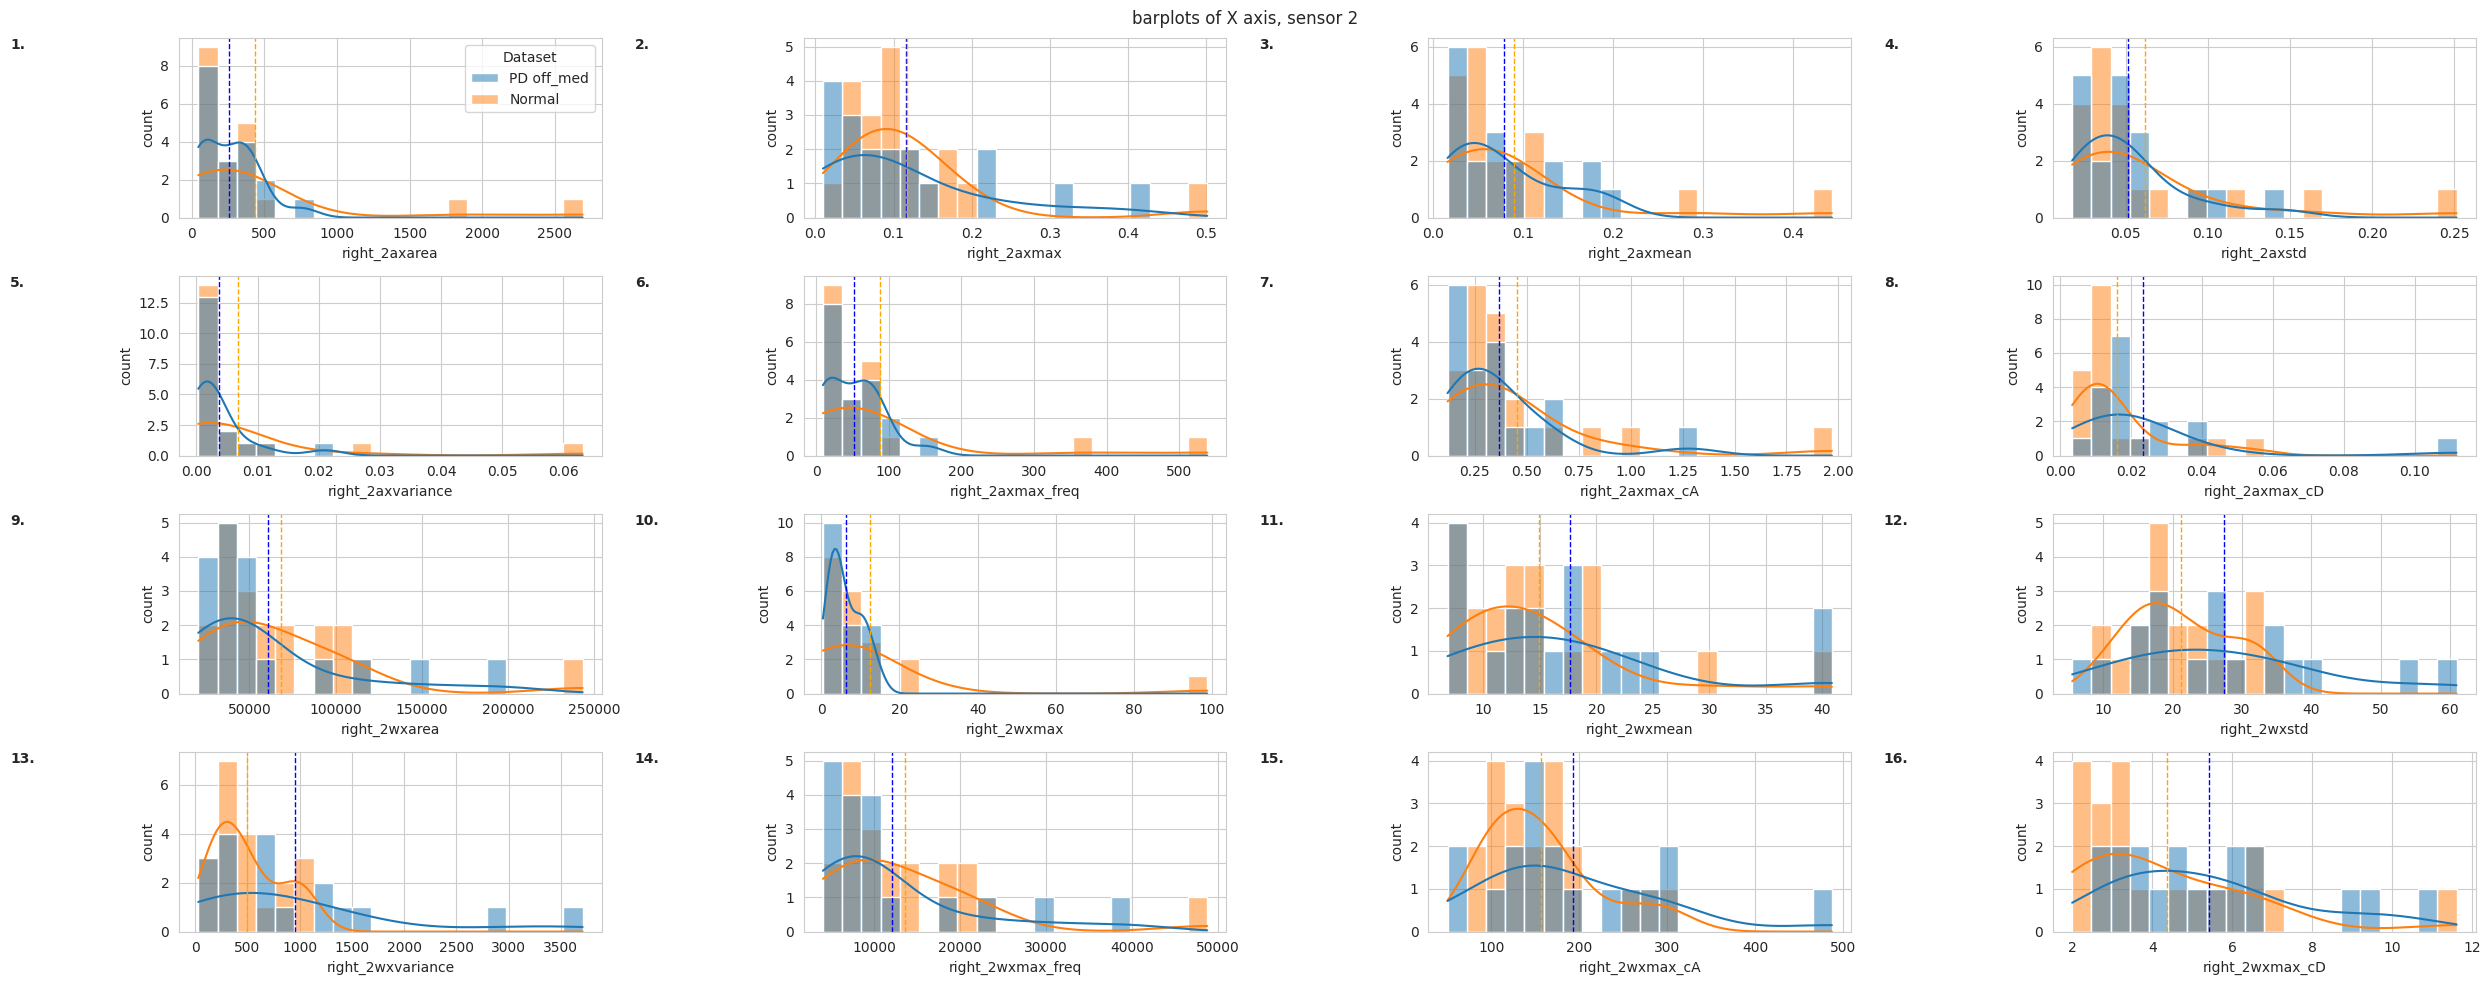

In [ ]:
# Reading features
folder_path = "/content/drive/My Drive/COLAB/Rigidity_WS/Extracted_Features_30HZ.xlsx"
df = pd.read_excel(folder_path)
df.columns=df.iloc[0]
df = df.drop(index=0)
df = df.drop(0, axis=1)
#numeric_columns = df.columns.difference(['subjects'])  # Exclude 'subjects' from conversion
#df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
axis = 'x'
sensor = '2'
# reading each category
PA_Left = data_per_category(df,category='PA',LR='L')
PA_Left_Z = filter_columns_by_letter(PA_Left, letter=axis, position=2)
PA_Left_Z_S2 = filter_columns_by_letter(PA_Left_Z, letter=sensor, position=0)
PA_Right = data_per_category(df,category='PA',LR='R')
PA_Right_Z = filter_columns_by_letter(PA_Right, letter=axis, position=2)
PA_Right_Z_S2 = filter_columns_by_letter(PA_Right_Z, letter=sensor, position=0)
PA_Both_X_S2 = pd.concat([PA_Left_Z_S2,PA_Right_Z_S2])

PB_Left = data_per_category(df,category='PB',LR='L')
PB_Left_Z = filter_columns_by_letter(PB_Left, letter=axis, position=2)
PB_Left_Z_S2 = filter_columns_by_letter(PB_Left_Z, letter=sensor, position=0)
PB_Right = data_per_category(df,category='PB',LR='R')
PB_Right_Z = filter_columns_by_letter(PB_Right, letter=axis, position=2)
PB_Right_Z_S2 = filter_columns_by_letter(PB_Right_Z, letter=sensor, position=0)
PB_Both_X_S2 = pd.concat([PB_Left_Z_S2,PB_Right_Z_S2]) # both sides of PDs before med

N_Left = data_per_category(df,category='N',LR='L')
N_Left_Z = filter_columns_by_letter(N_Left, letter=axis, position=2)
N_Left_Z_S2 = filter_columns_by_letter(N_Left_Z, letter=sensor, position=0)
N_Right = data_per_category(df,category='N',LR='R')
N_Right_Z = filter_columns_by_letter(N_Right, letter=axis, position=2)
N_Right_Z_S2 = filter_columns_by_letter(N_Right_Z, letter=sensor, position=0)
N_Both_X_S2 = pd.concat([N_Left_Z_S2,N_Right_Z_S2]) # to have both sides of healthy subjects
# add lefts to rights
PA_Both_X_S2['Dataset'] = 'PD off_med'
N_Both_X_S2['Dataset'] = 'Normal'
combined_data = pd.concat([PA_Both_X_S2, N_Both_X_S2])
'''
features of right and left side for only sensor 2, wrist, are extracted seperately.
each containing 16 features related to Z axis
(having 8 features for a and 8 for w).
Steps: category&LR ==> axis ==> sensor
'''
# scatte plot for only Z axis

fig, axes = plt.subplots(4,4,figsize=(25,10))
#figg, axess = plt.subplots(4,4,figsize=(25,6))
#axess = axess.flatten()
axes = axes.flatten()
for i,j in enumerate(N_Right_Z_S2.columns):
  if j=='subjects':
    continue
  else:
    ax = axes[i-1]
    #axx = axess[i-1]

    #sns.kdeplot(data=PB_Right_Z_S2[j],ax = ax, color='red', label='right')
    #sns.kdeplot(data=PB_Both_Z_S2[j],lw = 5,ax = axx, color='blue', label='PB_Both_Z_S2')
    #sns.kdeplot(data=N_Both_Z_S2[j],lw = 5,ax = axx, color='green', label='N_Both_Z_S2')
    # ----Plot the combined dataset with hue='Dataset'
    sns.set_style('whitegrid')
    if i == 1:
      sns.histplot(data=combined_data, x=j, bins=20, hue='Dataset', kde=True,ax = ax)
    else:
      sns.histplot(data=combined_data, x=j, bins=20, hue='Dataset', kde=True,legend=False,ax = ax)
    ax.axvline(PA_Both_X_S2[j].mean(axis=0),linestyle='--',color='blue',  linewidth=1)
    ax.axvline(N_Both_X_S2[j].mean(axis=0),linestyle='--',color='orange',  linewidth=1)
    ax.text(-0.4, 1, str(i)+'.', transform=ax.transAxes, va='top',ha='left',fontsize=10,weight='bold')
    ax.set_xlabel(f'right_{j}')
    ax.set_ylabel(f'count')
#figg.suptitle('Distribution Plots of Z axis, sensor 2')
fig.suptitle('barplots of X axis, sensor 2')
plt.tight_layout()
plt.show()


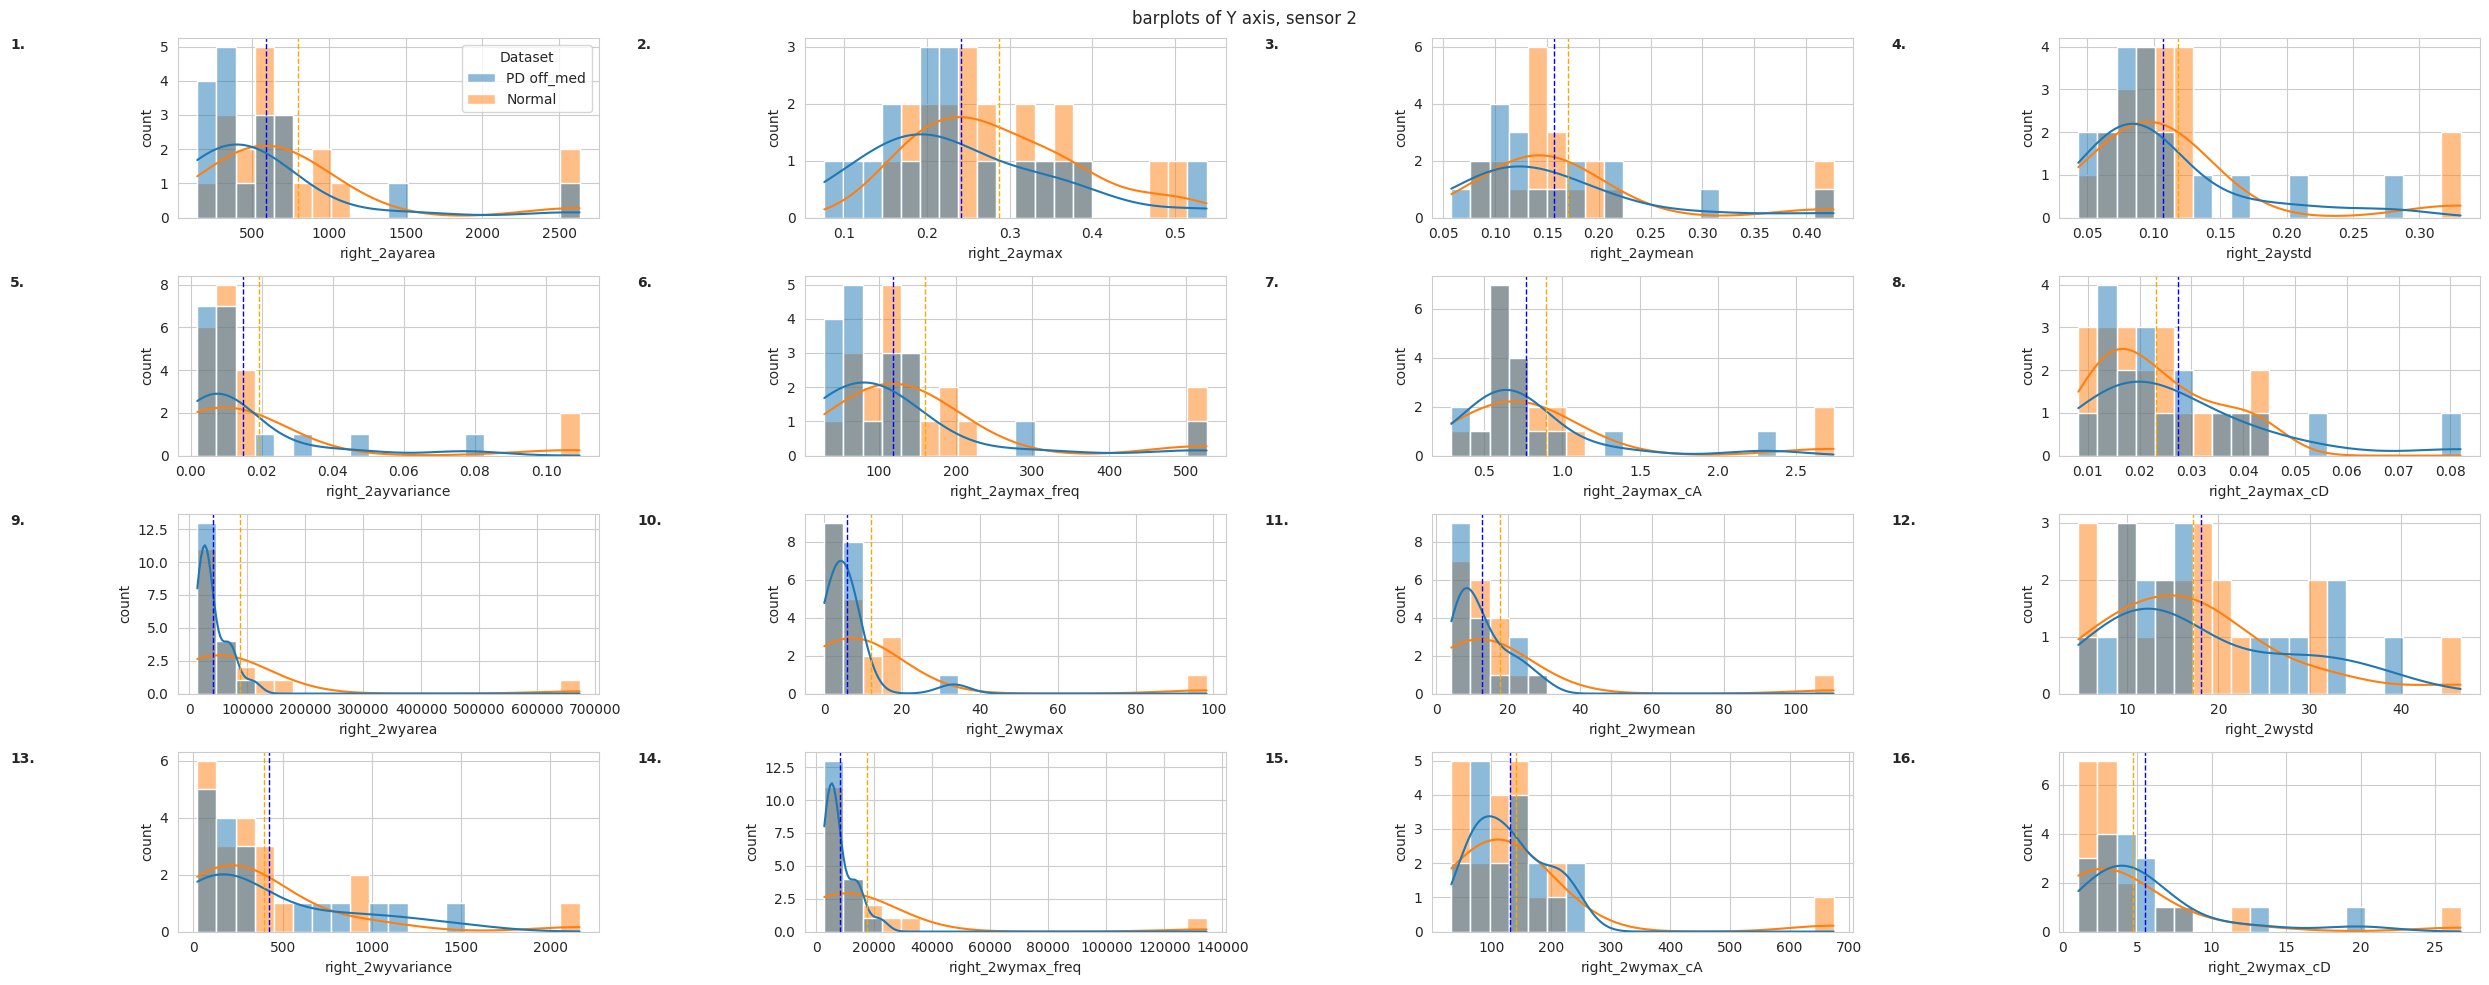

In [ ]:
# Reading features
folder_path = "/content/drive/My Drive/COLAB/Rigidity_WS/Extracted_Features_30HZ.xlsx"
df = pd.read_excel(folder_path)
df.columns=df.iloc[0]
df = df.drop(index=0)
df = df.drop(0, axis=1)
#numeric_columns = df.columns.difference(['subjects'])  # Exclude 'subjects' from conversion
#df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
axis = 'y'
sensor = '2'
# reading each category
PA_Left = data_per_category(df,category='PA',LR='L')
PA_Left_Z = filter_columns_by_letter(PA_Left, letter=axis, position=2)
PA_Left_Z_S2 = filter_columns_by_letter(PA_Left_Z, letter=sensor, position=0)
PA_Right = data_per_category(df,category='PA',LR='R')
PA_Right_Z = filter_columns_by_letter(PA_Right, letter=axis, position=2)
PA_Right_Z_S2 = filter_columns_by_letter(PA_Right_Z, letter=sensor, position=0)
PA_Both_X_S2 = pd.concat([PA_Left_Z_S2,PA_Right_Z_S2])

PB_Left = data_per_category(df,category='PB',LR='L')
PB_Left_Z = filter_columns_by_letter(PB_Left, letter=axis, position=2)
PB_Left_Z_S2 = filter_columns_by_letter(PB_Left_Z, letter=sensor, position=0)
PB_Right = data_per_category(df,category='PB',LR='R')
PB_Right_Z = filter_columns_by_letter(PB_Right, letter=axis, position=2)
PB_Right_Z_S2 = filter_columns_by_letter(PB_Right_Z, letter=sensor, position=0)
PB_Both_X_S2 = pd.concat([PB_Left_Z_S2,PB_Right_Z_S2]) # both sides of PDs before med

N_Left = data_per_category(df,category='N',LR='L')
N_Left_Z = filter_columns_by_letter(N_Left, letter=axis, position=2)
N_Left_Z_S2 = filter_columns_by_letter(N_Left_Z, letter=sensor, position=0)
N_Right = data_per_category(df,category='N',LR='R')
N_Right_Z = filter_columns_by_letter(N_Right, letter=axis, position=2)
N_Right_Z_S2 = filter_columns_by_letter(N_Right_Z, letter=sensor, position=0)
N_Both_X_S2 = pd.concat([N_Left_Z_S2,N_Right_Z_S2]) # to have both sides of healthy subjects
# add lefts to rights
PA_Both_X_S2['Dataset'] = 'PD off_med'
N_Both_X_S2['Dataset'] = 'Normal'
combined_data = pd.concat([PA_Both_X_S2, N_Both_X_S2])
'''
features of right and left side for only sensor 2, wrist, are extracted seperately.
each containing 16 features related to Z axis
(having 8 features for a and 8 for w).
Steps: category&LR ==> axis ==> sensor
'''
# scatte plot for only Z axis

fig, axes = plt.subplots(4,4,figsize=(25,10))
#figg, axess = plt.subplots(4,4,figsize=(25,6))
#axess = axess.flatten()
axes = axes.flatten()
for i,j in enumerate(N_Right_Z_S2.columns):
  if j=='subjects':
    continue
  else:
    ax = axes[i-1]
    #axx = axess[i-1]

    #sns.kdeplot(data=PB_Right_Z_S2[j],ax = ax, color='red', label='right')
    #sns.kdeplot(data=PB_Both_Z_S2[j],lw = 5,ax = axx, color='blue', label='PB_Both_Z_S2')
    #sns.kdeplot(data=N_Both_Z_S2[j],lw = 5,ax = axx, color='green', label='N_Both_Z_S2')
    # ----Plot the combined dataset with hue='Dataset'
    sns.set_style('whitegrid')
    if i == 1:
      sns.histplot(data=combined_data, x=j, bins=20, hue='Dataset', kde=True,ax = ax)
    else:
      sns.histplot(data=combined_data, x=j, bins=20, hue='Dataset', kde=True,legend=False,ax = ax)
    ax.axvline(PA_Both_X_S2[j].mean(axis=0),linestyle='--',color='blue',  linewidth=1)
    ax.axvline(N_Both_X_S2[j].mean(axis=0),linestyle='--',color='orange',  linewidth=1)
    ax.text(-0.4, 1, str(i)+'.', transform=ax.transAxes, va='top',ha='left',fontsize=10,weight='bold')
    ax.set_xlabel(f'right_{j}')
    ax.set_ylabel(f'count')
#figg.suptitle('Distribution Plots of Z axis, sensor 2')
fig.suptitle('barplots of Y axis, sensor 2')
plt.tight_layout()
plt.show()


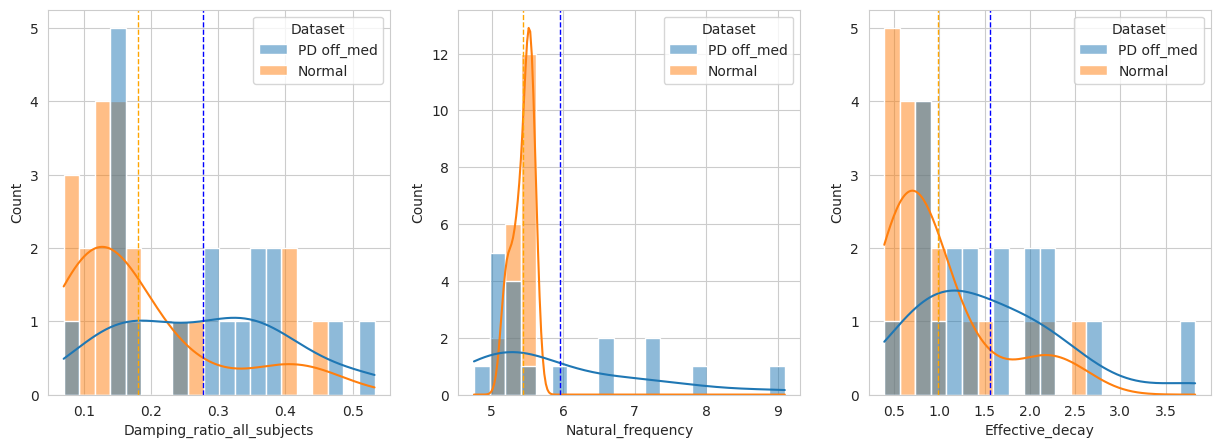

In [ ]:
# Reading features
folder_path = "/content/drive/My Drive/COLAB/Rigidity_WS/Extracted_Features_30HZ.xlsx"
df = pd.read_excel(folder_path)
df.columns=df.iloc[0]
df = df.drop(index=0)
df = df.drop(0, axis=1)
# reading each category
PA_Left = data_per_category(df,category='PA',LR='L')
PA_Left = PA_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Right = data_per_category(df,category='PA',LR='R')
PA_Right = PA_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Both_X_S2 = pd.concat([PA_Left,PA_Right])

PB_Left = data_per_category(df,category='PB',LR='L')
PB_Left = PB_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Right = data_per_category(df,category='PB',LR='R')
PB_Right = PB_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Both_X_S2 = pd.concat([PB_Left,PB_Right]) # both sides of PDs before med

N_Left = data_per_category(df,category='N',LR='L')
N_Left = N_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Right = data_per_category(df,category='N',LR='R')
N_Right = N_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Both_X_S2 = pd.concat([N_Left,N_Right]) # to have both sides of healthy subjects
# add lefts to rights
PA_Both_X_S2=pd.DataFrame(PA_Both_X_S2)
N_Both_X_S2=pd.DataFrame(N_Both_X_S2)
PA_Both_X_S2['Dataset'] = 'PD off_med'
N_Both_X_S2['Dataset'] = 'Normal'
combined_data = pd.concat([PA_Both_X_S2, N_Both_X_S2])

fig, axes = plt.subplots(1,3,figsize=(15,5))
axes = axes.flatten()
sns.histplot(data=combined_data, x='Damping_ratio_all_subjects', bins=20, hue='Dataset', kde=True,ax = axes[0])
axes[0].axvline(PA_Both_X_S2['Damping_ratio_all_subjects'].mean(axis=0),linestyle='--',color='blue',  linewidth=1)
axes[0].axvline(N_Both_X_S2['Damping_ratio_all_subjects'].mean(axis=0),linestyle='--',color='orange',  linewidth=1)
sns.histplot(data=combined_data, x='Natural_frequency', bins=20, hue='Dataset', kde=True,ax = axes[1])
axes[1].axvline(PA_Both_X_S2['Natural_frequency'].mean(axis=0),linestyle='--',color='blue',  linewidth=1)
axes[1].axvline(N_Both_X_S2['Natural_frequency'].mean(axis=0),linestyle='--',color='orange',  linewidth=1)
sns.histplot(data=combined_data, x='Effective_decay', bins=20, hue='Dataset', kde=True,ax = axes[2])
axes[2].axvline(PA_Both_X_S2['Effective_decay'].mean(axis=0),linestyle='--',color='blue',  linewidth=1)
axes[2].axvline(N_Both_X_S2['Effective_decay'].mean(axis=0),linestyle='--',color='orange',  linewidth=1)


# Label Matrix Data-Driven and Model-Driven

In [ ]:
def data_per_category(df,category, LR):
  dataframes_for_category = df[df['subjects'].str.contains(category) & df['subjects'].str.contains(LR)]
  return dataframes_for_category
def filter_columns_by_letter(df, letter, position):
    selected_columns = ['subjects'] + [col for col in df.columns if len(col) > position and col[position] == letter]
    return df[selected_columns]

0
259.8517356911974
439.469260918117
1
0.11628236278031623
0.11712260687225613
2
0.07907331558742488
0.09005457614864391
3
0.05149904626634221
0.06188596564689262
4
0.0036705536256241636
0.006817260349421303
5
52.032524558261194
87.95593844001077
6
0.36869740289364966
0.4539483139099155
7
0.023431008220991218
0.016198864580113125
8
588.7493746311343
800.9972224708774
9
0.24111678233165007
0.28747374646565255
10
0.15714781651179968
0.17031111568900317
11
0.10707627622724306
0.11863481670280895
12
0.014737581058857347
0.019331209319279313
13
117.87682534547925
160.34718840628793
14
0.7703533609621313
0.8980429852899384
15
0.02738736678486091
0.023127138081028176
16
472.3423315615242
345.241356121165
17
0.18046725349141265
0.13415293181568502
18
0.13007803367179804
0.07881606635468479
19
0.0848208335264649
0.04883195262280587
20
0.010063045224039151
0.0027836810258758116
21
94.56513785314161
69.1193808727306
22
0.49618512814498583
0.3403284464155584
23
0.014476709312564043
0.0111734161066

100%|██████████| 500/500 [00:00<00:00, 661.12epoch/s]


[0.2914422  0.43129835 0.6528781  0.50795819 0.5373583  0.70634222
 0.67050286 0.64864736 0.65415269 0.45632067 0.70987893 0.72413895
 0.46183013 0.77523567 0.83408428 0.51036095 0.56622008 0.48239256
 0.33550939 0.11335425 0.28561443 0.26761317 0.4314839  0.32971492
 0.55297133 0.2708394  0.55853134 0.65324758 0.44440949 0.09729943
 0.44773233 0.40791779 0.43917159 0.36837849 0.33086034 0.48617724
 0.32674373 0.61919888]


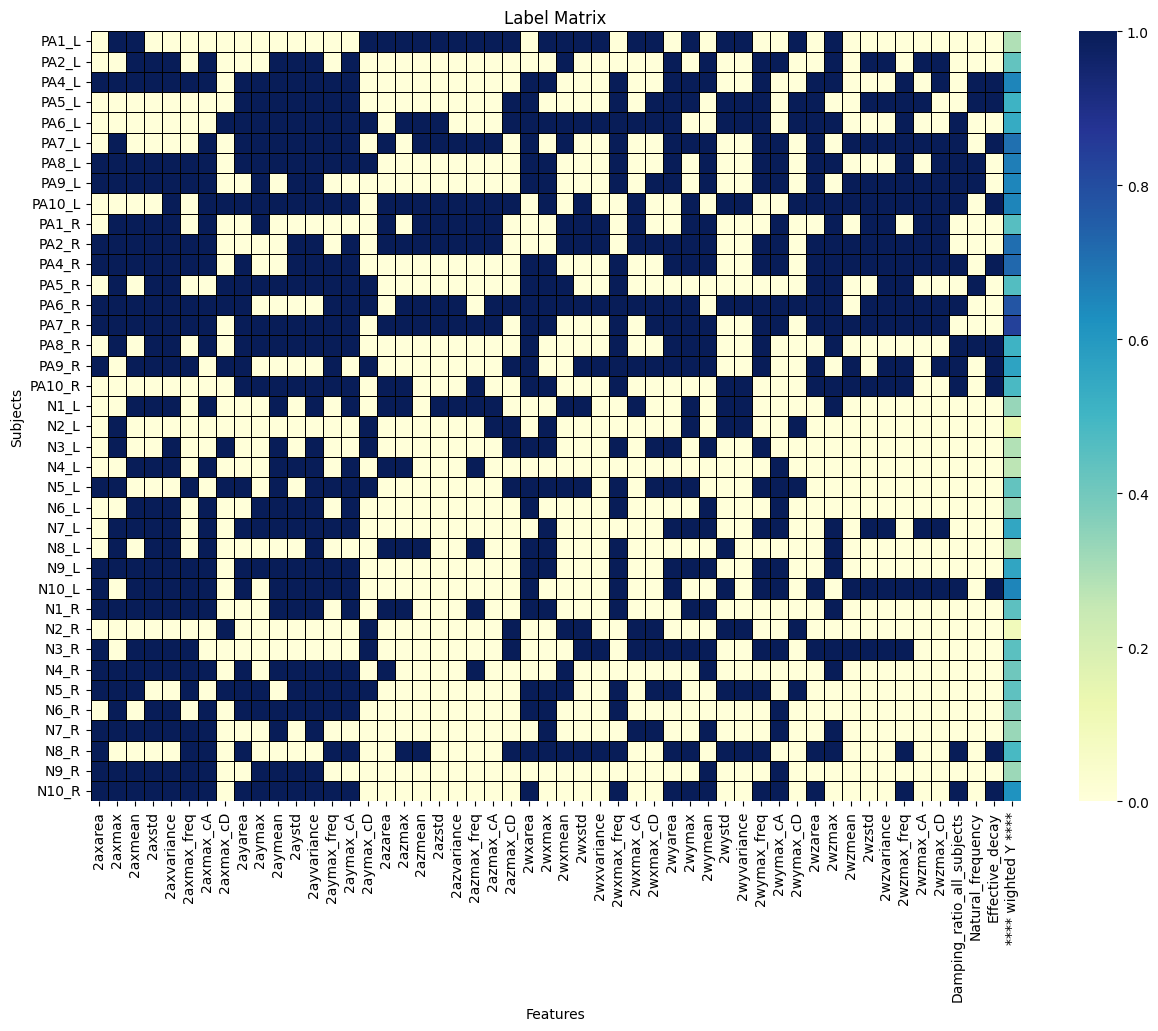

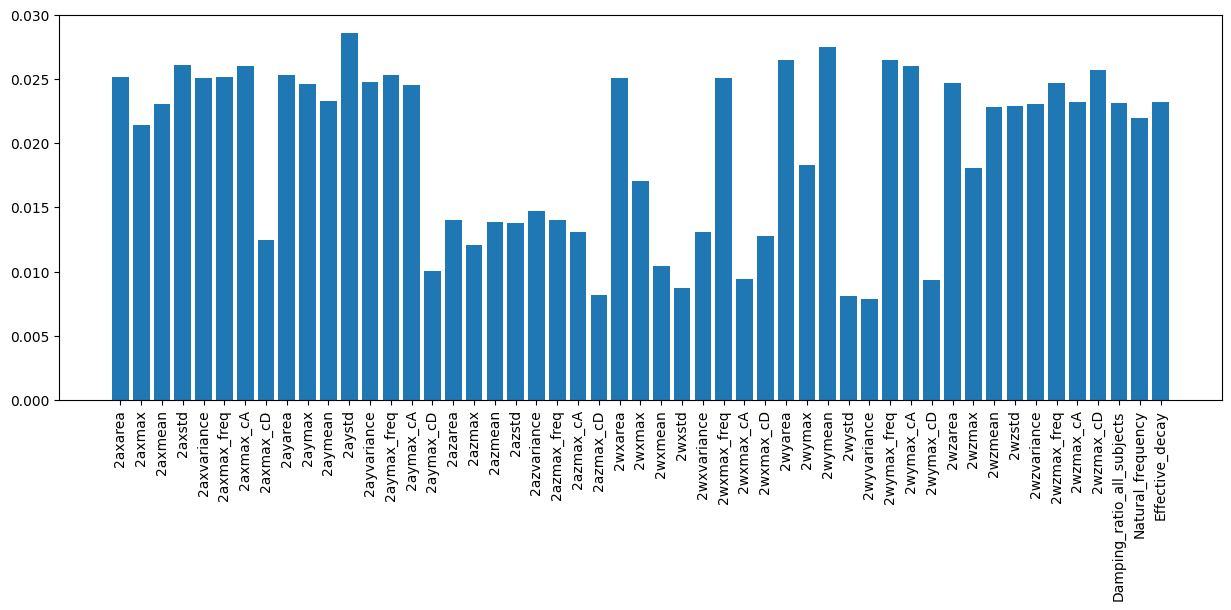

In [ ]:
# Reading features
folder_path = "/content/drive/My Drive/COLAB/Rigidity_WS/Extracted_Features_30HZ.xlsx"
df = pd.read_excel(folder_path)
df.columns=df.iloc[0]
df = df.drop(index=0)
df = df.drop(0, axis=1)

# reading each category
sensor = '2'
PA_Left = data_per_category(df,category='PA',LR='L')
PA_Left_ahmad = PA_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Left_S2 = filter_columns_by_letter(PA_Left, letter=sensor, position=0) # 9 rows × 49 columns ( one column is names)
PA_Left_S2 = pd.concat([PA_Left_S2, PA_Left_ahmad], axis=1) # 9, 52
PA_Right = data_per_category(df,category='PA',LR='R')
PA_Right_ahmad = PA_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Right_S2 = filter_columns_by_letter(PA_Right, letter=sensor, position=0)
PA_Right_S2 = pd.concat([PA_Right_S2, PA_Right_ahmad], axis=1)
PA_Both_S2 = pd.concat([PA_Left_S2,PA_Right_S2])

PB_Left = data_per_category(df,category='PB',LR='L')
PB_Left_ahmad = PB_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Left_S2 = filter_columns_by_letter(PB_Left, letter=sensor, position=0)
PB_Left_S2 = pd.concat([PB_Left_S2, PB_Left_ahmad], axis=1)
PB_Right = data_per_category(df,category='PB',LR='R')
PB_Right_ahmad = PB_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Right_S2 = filter_columns_by_letter(PB_Right, letter=sensor, position=0)
PB_Right_S2 = pd.concat([PB_Right_S2, PB_Right_ahmad], axis=1)
PB_Both_S2 = pd.concat([PB_Left_S2,PB_Right_S2]) # both sides of PDs before med

N_Left = data_per_category(df,category='N',LR='L')
N_Left_ahmad = N_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Left_S2 = filter_columns_by_letter(N_Left, letter=sensor, position=0)
N_Left_S2 = pd.concat([N_Left_S2, N_Left_ahmad], axis=1)
N_Right = data_per_category(df,category='N',LR='R')
N_Right_ahmad = N_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Right_S2 = filter_columns_by_letter(N_Right, letter=sensor, position=0)
N_Right_S2 = pd.concat([N_Right_S2,N_Right_ahmad], axis=1)
N_Both_S2 = pd.concat([N_Left_S2,N_Right_S2]) # to have both sides of healthy subjects
# add lefts to rights
PA_Both_S2=pd.DataFrame(PA_Both_S2)
N_Both_S2=pd.DataFrame(N_Both_S2)
PA_Both_S2['Dataset'] = 'PD off_med'
N_Both_S2['Dataset'] = 'Normal'
combined_df = pd.concat([PA_Both_S2, N_Both_S2], axis=0, ignore_index=True) # 38,53
Y_true = np.concatenate([np.ones(len(PA_Both_S2)), np.zeros(len(N_Both_S2))])

# Thresholds are set on the average value of Normal subjects

thresholds = (PA_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51
more_or_less = (N_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51



# *******************   Label_matrix   ***********************
label_matrix = np.zeros((len(N_Both_S2)+len(PA_Both_S2),N_Both_S2.shape[1]-2))

# set values of Label matrix
for i in range(len(thresholds)):
    print(i)
    print(thresholds[i])
    print(more_or_less[i])
    if thresholds[i] >= more_or_less[i]:
      # then PDs are those who are more than the threshold and should be labeled as 1
      for j in range(len(combined_df)):
        if combined_df.loc[j][i+1] >= thresholds[i]:
          label_matrix[j][i] = 1
    else:
      for j in range(len(combined_df)):

        if combined_df.loc[j][i+1] < thresholds[i]:
          label_matrix[j][i] = 1

with np.printoptions(threshold=np.inf):
    print(label_matrix)
# -----------

label_model = LabelModel(verbose=True)
label_model.fit(L_train=label_matrix,seed=123)#, n_epochs=500, log_freq=100, seed=123)
probs_train = label_model.predict_proba(L=label_matrix)
# weights
weights=label_model.get_weights()
weights/=np.sum(weights)
data_Y=np.sum(weights*label_matrix,axis=1)
print(data_Y)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(np.c_[label_matrix,data_Y], annot=False, cmap="YlGnBu", fmt=".0f", ax=ax, xticklabels=np.r_[combined_df.drop(columns=['Dataset']).columns.values[1:],['**** wighted Y ****']], yticklabels=combined_df['subjects'],linewidths=0.5, linecolor='black')
ax.set_title("Label Matrix")
ax.set_xlabel("Features")
ax.set_ylabel("Subjects")
plt.show()
# ----
plt.figure(figsize=(15,5))
plt.bar(combined_df.drop(columns=['subjects','Dataset']).columns,weights)
plt.xticks(combined_df.drop(columns=['subjects','Dataset']).columns, rotation=90)
plt.show()

## model

In [ ]:
# both sides of subject
y_pred_tot=np.zeros((len(combined_df)))
for ii in range(int(len(combined_df)/2)):
    print(ii)
    ind = [ii, ii+9]
    if ii>=9:
      ind = [ii+9,ii+9+10]
    print(ind)
    label_model = LabelModel(verbose=False)
    label_matrix_temp=np.delete(label_matrix,ind,0)
    label_model.fit(label_matrix_temp, seed=123)
    weights=label_model.get_weights()
    weights/=np.sum(weights) # نرمالایز کردن وزن ها
    print(weights.shape)

    data_Y=np.sum(weights*label_matrix,axis=1)


    # data_Y_train=np.delete(Y_true,ii,0)
    data_Y_test=data_Y[ind]
    # data_X_train=np.delete(data_X[:,:15],ii,0)
    data_X_test = combined_df.iloc[ind]
    data_X_test = tf.convert_to_tensor(data_X_test.drop(columns=['subjects','Dataset']).values, dtype = tf.float32)
    data_X_train = tf.convert_to_tensor(combined_df.drop(columns=['subjects','Dataset']).values, dtype = tf.float32)
    #data_X_test = data_X_train[ind,:]
    mu=np.mean(data_X_train,axis=0)
    std=np.std(data_X_train,axis=0)
    data_X_train=data_X_train-mu
    data_X_train=data_X_train/std

    data_X_test=data_X_test-mu
    data_X_test=data_X_test/std


    model = keras.models.Sequential()
    model.add(keras.Input(shape=(51,)))
    model.add(keras.layers.Dense(120, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(data_X_train,data_Y,batch_size=1,epochs=50,verbose=0)


    y_pred=model.predict(data_X_test)
    y_true=Y_true[ind]

    print(ind,'pred',y_pred,'label',y_true)
    y_pred_tot[ind[0]]=y_pred[0][0]
    y_pred_tot[ind[1]]=y_pred[1][0]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_true,np.round(y_pred_tot))
print('accuracy',accuracy)
from sklearn.metrics import precision_recall_fscore_support
print('Pre Rec F1:',precision_recall_fscore_support(Y_true, np.round(y_pred_tot), average='macro'))


0
[0, 9]


100%|██████████| 100/100 [00:00<00:00, 627.60epoch/s]

(51,)


1/1 [==============================] - 0s 70ms/step
[0, 9] pred [[0.46827674]
 [0.6046621 ]] label [1. 1.]
1
[1, 10]


100%|██████████| 100/100 [00:00<00:00, 418.37epoch/s]


(51,)
1/1 [==============================] - 0s 52ms/step
[1, 10] pred [[0.44726905]
 [0.7233996 ]] label [1. 1.]
2
[2, 11]


100%|██████████| 100/100 [00:00<00:00, 625.62epoch/s]

(51,)


1/1 [==============================] - 0s 49ms/step
[2, 11] pred [[0.58958554]
 [0.67805904]] label [1. 1.]
3
[3, 12]


100%|██████████| 100/100 [00:00<00:00, 660.08epoch/s]

(51,)


1/1 [==============================] - 0s 52ms/step
[3, 12] pred [[0.52663714]
 [0.47371256]] label [1. 1.]
4
[4, 13]


100%|██████████| 100/100 [00:00<00:00, 668.89epoch/s]

(51,)


1/1 [==============================] - 0s 49ms/step
[4, 13] pred [[0.47141564]
 [0.7023905 ]] label [1. 1.]
5
[5, 14]


100%|██████████| 100/100 [00:00<00:00, 651.16epoch/s]

(51,)


1/1 [==============================] - 0s 50ms/step
[5, 14] pred [[0.6893105]
 [0.8229741]] label [1. 1.]
6
[6, 15]


100%|██████████| 100/100 [00:00<00:00, 662.75epoch/s]

(51,)


1/1 [==============================] - 0s 51ms/step
[6, 15] pred [[0.6256398 ]
 [0.48403236]] label [1. 1.]
7
[7, 16]


100%|██████████| 100/100 [00:00<00:00, 659.76epoch/s]

(51,)


1/1 [==============================] - 0s 69ms/step
[7, 16] pred [[0.634773 ]
 [0.5163976]] label [1. 1.]
8
[8, 17]


100%|██████████| 100/100 [00:00<00:00, 468.00epoch/s]


(51,)
1/1 [==============================] - 0s 49ms/step
[8, 17] pred [[0.6778877 ]
 [0.48430094]] label [1. 1.]
9
[18, 28]


100%|██████████| 100/100 [00:00<00:00, 630.76epoch/s]

(51,)


1/1 [==============================] - 0s 51ms/step
[18, 28] pred [[0.34314716]
 [0.4702049 ]] label [0. 0.]
10
[19, 29]


100%|██████████| 100/100 [00:00<00:00, 667.93epoch/s]

(51,)


1/1 [==============================] - 0s 59ms/step
[19, 29] pred [[0.23737533]
 [0.32641074]] label [0. 0.]
11
[20, 30]


100%|██████████| 100/100 [00:00<00:00, 645.62epoch/s]

(51,)


1/1 [==============================] - 0s 48ms/step
[20, 30] pred [[0.29358795]
 [0.46052757]] label [0. 0.]
12
[21, 31]


100%|██████████| 100/100 [00:00<00:00, 608.03epoch/s]

(51,)


1/1 [==============================] - 0s 48ms/step
[21, 31] pred [[0.26820922]
 [0.4119928 ]] label [0. 0.]
13
[22, 32]


100%|██████████| 100/100 [00:00<00:00, 678.92epoch/s]

(51,)


1/1 [==============================] - 0s 51ms/step
[22, 32] pred [[0.44701415]
 [0.44679704]] label [0. 0.]
14
[23, 33]


100%|██████████| 100/100 [00:00<00:00, 649.45epoch/s]

(51,)


1/1 [==============================] - 0s 48ms/step
[23, 33] pred [[0.32195914]
 [0.34553832]] label [0. 0.]
15
[24, 34]


100%|██████████| 100/100 [00:00<00:00, 680.55epoch/s]

(51,)


1/1 [==============================] - 0s 48ms/step
[24, 34] pred [[0.51768965]
 [0.333952  ]] label [0. 0.]
16
[25, 35]


100%|██████████| 100/100 [00:00<00:00, 677.64epoch/s]

(51,)


1/1 [==============================] - 0s 49ms/step
[25, 35] pred [[0.27798247]
 [0.5181189 ]] label [0. 0.]
17
[26, 36]


100%|██████████| 100/100 [00:00<00:00, 675.99epoch/s]

(51,)


1/1 [==============================] - 0s 50ms/step
[26, 36] pred [[0.5173401 ]
 [0.30552164]] label [0. 0.]
18
[27, 37]


100%|██████████| 100/100 [00:00<00:00, 625.58epoch/s]

(51,)


1/1 [==============================] - 0s 50ms/step
[27, 37] pred [[0.63037235]
 [0.59738576]] label [0. 0.]
accuracy 0.7105263157894737
Pre Rec F1: (0.7100840336134454, 0.7083333333333333, 0.7087108013937282, None)


# Label Matrix Only Data-Driven data

0
259.8517356911974
439.469260918117
1
0.11628236278031623
0.11712260687225613
2
0.07907331558742488
0.09005457614864391
3
0.05149904626634221
0.06188596564689262
4
0.0036705536256241636
0.006817260349421303
5
52.032524558261194
87.95593844001077
6
0.36869740289364966
0.4539483139099155
7
0.023431008220991218
0.016198864580113125
8
588.7493746311343
800.9972224708774
9
0.24111678233165007
0.28747374646565255
10
0.15714781651179968
0.17031111568900317
11
0.10707627622724306
0.11863481670280895
12
0.014737581058857347
0.019331209319279313
13
117.87682534547925
160.34718840628793
14
0.7703533609621313
0.8980429852899384
15
0.02738736678486091
0.023127138081028176
16
472.3423315615242
345.241356121165
17
0.18046725349141265
0.13415293181568502
18
0.13007803367179804
0.07881606635468479
19
0.0848208335264649
0.04883195262280587
20
0.010063045224039151
0.0027836810258758116
21
94.56513785314161
69.1193808727306
22
0.49618512814498583
0.3403284464155584
23
0.014476709312564043
0.0111734161066

100%|██████████| 500/500 [00:00<00:00, 664.18epoch/s]


[0.31290872 0.47940689 0.65771004 0.47766137 0.53123587 0.70652056
 0.67887457 0.6556625  0.64610059 0.5087237  0.77429209 0.73166835
 0.46953844 0.79802465 0.90341964 0.48176343 0.54757299 0.45868842
 0.37472795 0.11762255 0.30701646 0.30803736 0.45471233 0.37151135
 0.60700617 0.30154614 0.61280831 0.65063635 0.49850893 0.09619164
 0.48145807 0.45861474 0.46291039 0.40496669 0.37803562 0.45384601
 0.37446753 0.6223428 ]


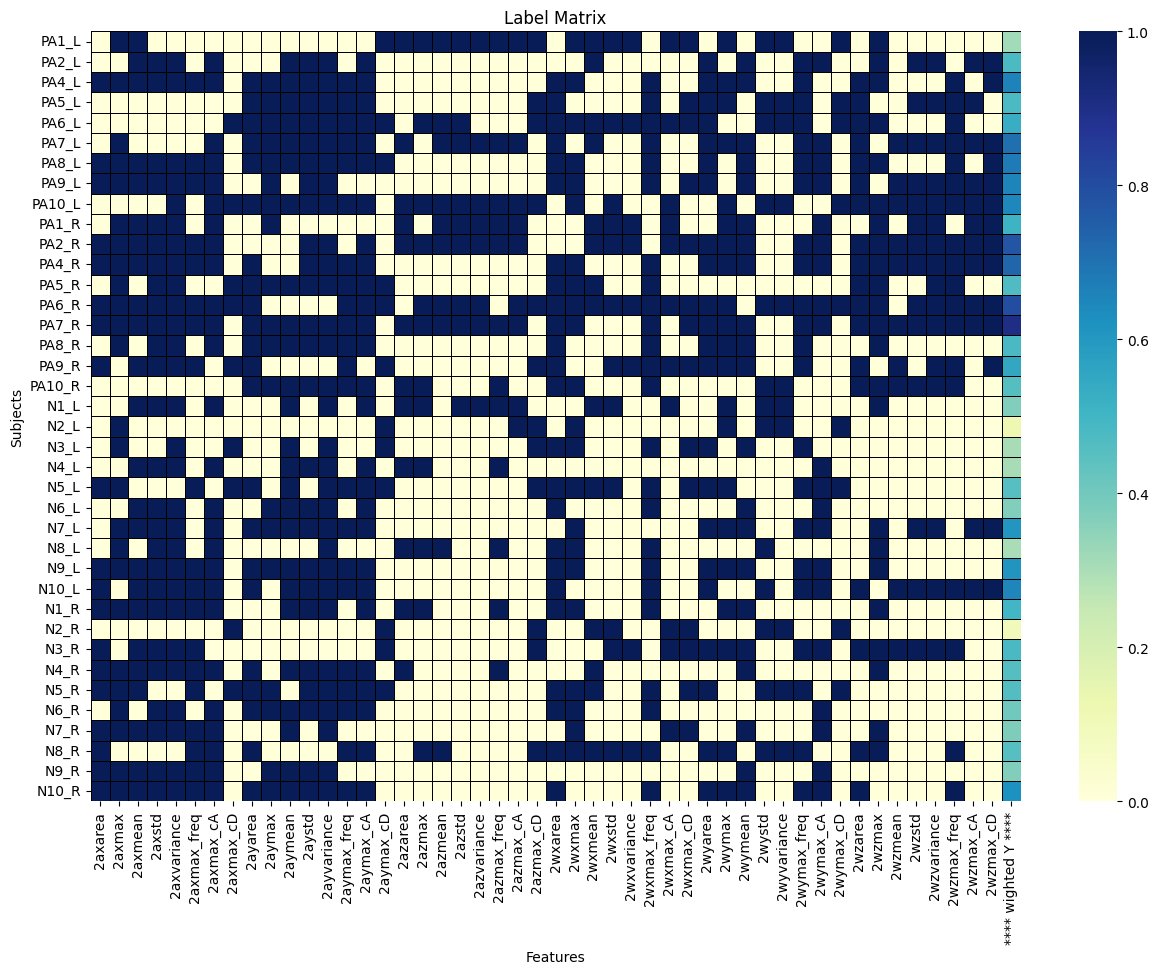

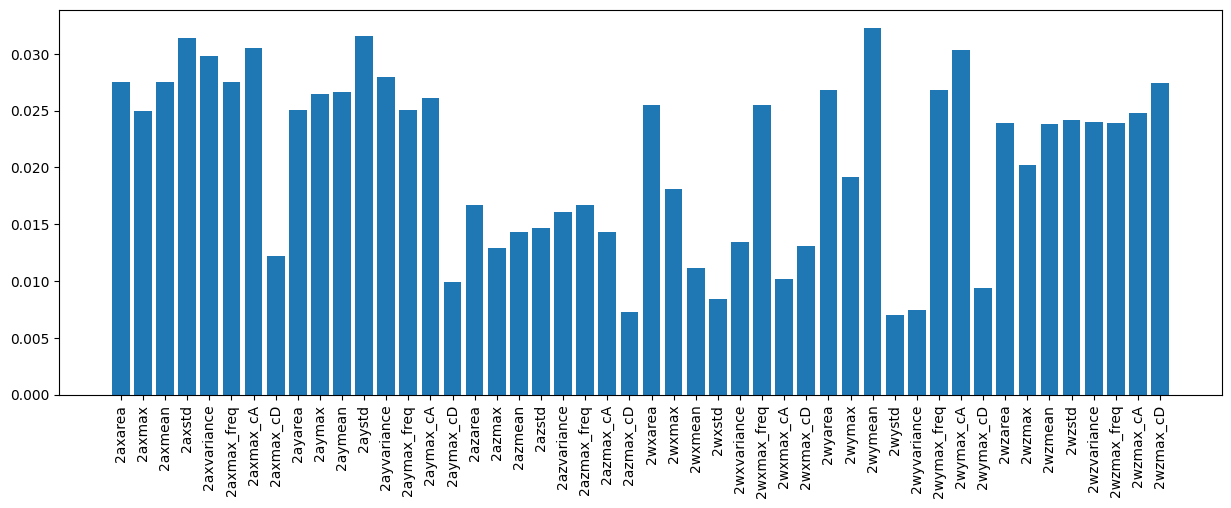

In [ ]:
# Reading features
folder_path = "/content/drive/My Drive/COLAB/Rigidity_WS/Extracted_Features_30HZ.xlsx"
df = pd.read_excel(folder_path)
df.columns=df.iloc[0]
df = df.drop(index=0)
df = df.drop(0, axis=1)

# reading each category
sensor = '2'
PA_Left = data_per_category(df,category='PA',LR='L')
PA_Left_ahmad = PA_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Left_S2 = filter_columns_by_letter(PA_Left, letter=sensor, position=0) # 9 rows × 49 columns ( one column is names)
#PA_Left_S2 = pd.concat([PA_Left_S2, PA_Left_ahmad], axis=1) # 9, 52
PA_Right = data_per_category(df,category='PA',LR='R')
PA_Right_ahmad = PA_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Right_S2 = filter_columns_by_letter(PA_Right, letter=sensor, position=0)
#PA_Right_S2 = pd.concat([PA_Right_S2, PA_Right_ahmad], axis=1)
PA_Both_S2 = pd.concat([PA_Left_S2,PA_Right_S2])

PB_Left = data_per_category(df,category='PB',LR='L')
PB_Left_ahmad = PB_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Left_S2 = filter_columns_by_letter(PB_Left, letter=sensor, position=0)
#PB_Left_S2 = pd.concat([PB_Left_S2, PB_Left_ahmad], axis=1)
PB_Right = data_per_category(df,category='PB',LR='R')
PB_Right_ahmad = PB_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Right_S2 = filter_columns_by_letter(PB_Right, letter=sensor, position=0)
#PB_Right_S2 = pd.concat([PB_Right_S2, PB_Right_ahmad], axis=1)
PB_Both_S2 = pd.concat([PB_Left_S2,PB_Right_S2]) # both sides of PDs before med

N_Left = data_per_category(df,category='N',LR='L')
N_Left_ahmad = N_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Left_S2 = filter_columns_by_letter(N_Left, letter=sensor, position=0)
#N_Left_S2 = pd.concat([N_Left_S2, N_Left_ahmad], axis=1)
N_Right = data_per_category(df,category='N',LR='R')
N_Right_ahmad = N_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Right_S2 = filter_columns_by_letter(N_Right, letter=sensor, position=0)
#N_Right_S2 = pd.concat([N_Right_S2,N_Right_ahmad], axis=1)
N_Both_S2 = pd.concat([N_Left_S2,N_Right_S2]) # to have both sides of healthy subjects
# add lefts to rights
PA_Both_S2=pd.DataFrame(PA_Both_S2)
N_Both_S2=pd.DataFrame(N_Both_S2)
PA_Both_S2['Dataset'] = 'PD off_med'
N_Both_S2['Dataset'] = 'Normal'
combined_df = pd.concat([PA_Both_S2, N_Both_S2], axis=0, ignore_index=True) # 38,53
Y_true = np.concatenate([np.ones(len(PA_Both_S2)), np.zeros(len(N_Both_S2))])

# Thresholds are set on the average value of Normal subjects

thresholds = (PA_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51
more_or_less = (N_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51



# *******************   Label_matrix   ***********************
label_matrix = np.zeros((len(N_Both_S2)+len(PA_Both_S2),N_Both_S2.shape[1]-2))

# set values of Label matrix
for i in range(len(thresholds)):
    print(i)
    print(thresholds[i])
    print(more_or_less[i])
    if thresholds[i] >= more_or_less[i]:
      # then PDs are those who are more than the threshold and should be labeled as 1
      for j in range(len(combined_df)):
        if combined_df.loc[j][i+1] >= thresholds[i]:
          label_matrix[j][i] = 1
    else:
      for j in range(len(combined_df)):

        if combined_df.loc[j][i+1] < thresholds[i]:
          label_matrix[j][i] = 1

with np.printoptions(threshold=np.inf):
    print(label_matrix)
# -----------

label_model = LabelModel(verbose=True)
label_model.fit(L_train=label_matrix, n_epochs=500, log_freq=100, seed=123)
probs_train = label_model.predict_proba(L=label_matrix)
# weights
weights=label_model.get_weights()
weights/=np.sum(weights)
data_Y=np.sum(weights*label_matrix,axis=1)
print(data_Y)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(np.c_[label_matrix,data_Y], annot=False, cmap="YlGnBu", fmt=".0f", ax=ax, xticklabels=np.r_[combined_df.drop(columns=['Dataset']).columns.values[1:],['**** wighted Y ****']], yticklabels=combined_df['subjects'],linewidths=0.5, linecolor='black')
ax.set_title("Label Matrix")
ax.set_xlabel("Features")
ax.set_ylabel("Subjects")
plt.show()
# ----
plt.figure(figsize=(15,5))
plt.bar(combined_df.drop(columns=['subjects','Dataset']).columns,weights)
plt.xticks(combined_df.drop(columns=['subjects','Dataset']).columns, rotation=90)
plt.show()

In [ ]:
# both sides of subject
y_pred_tot=np.zeros((len(combined_df)))
for ii in range(int(len(combined_df)/2)):
    print(ii)
    ind = [ii, ii+9]
    if ii>=9:
      ind = [ii+9,ii+9+10]
    print(ind)
    label_model = LabelModel(verbose=False)
    label_matrix_temp=np.delete(label_matrix,ind,0)
    label_model.fit(label_matrix_temp, seed=123)
    weights=label_model.get_weights()
    weights/=np.sum(weights) # نرمالایز کردن وزن ها
    print(weights.shape)

    data_Y=np.sum(weights*label_matrix,axis=1)


    # data_Y_train=np.delete(Y_true,ii,0)
    data_Y_test=data_Y[ind]
    # data_X_train=np.delete(data_X[:,:15],ii,0)
    data_X_test = combined_df.iloc[ind]
    data_X_test = tf.convert_to_tensor(data_X_test.drop(columns=['subjects','Dataset']).values, dtype = tf.float32)
    data_X_train = tf.convert_to_tensor(combined_df.drop(columns=['subjects','Dataset']).values, dtype = tf.float32)
    #data_X_test = data_X_train[ind,:]
    mu=np.mean(data_X_train,axis=0)
    std=np.std(data_X_train,axis=0)
    data_X_train=data_X_train-mu
    data_X_train=data_X_train/std

    data_X_test=data_X_test-mu
    data_X_test=data_X_test/std


    model = keras.models.Sequential()
    model.add(keras.Input(shape=(48,)))
    model.add(keras.layers.Dense(48*2, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(data_X_train,data_Y,batch_size=1,epochs=50,verbose=0)


    y_pred=model.predict(data_X_test)
    y_true=Y_true[ind]

    print(ind,'pred',y_pred,'label',y_true)
    y_pred_tot[ind[0]]=y_pred[0][0]
    y_pred_tot[ind[1]]=y_pred[1][0]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_true,np.round(y_pred_tot))
print('accuracy',accuracy)
from sklearn.metrics import precision_recall_fscore_support
print('Pre Rec F1:',precision_recall_fscore_support(Y_true, np.round(y_pred_tot), average='macro'))


0
[0, 9]


100%|██████████| 100/100 [00:00<00:00, 675.27epoch/s]

(48,)


1/1 [==============================] - 0s 51ms/step
[0, 9] pred [[0.32391372]
 [0.48693997]] label [1. 1.]
1
[1, 10]


100%|██████████| 100/100 [00:00<00:00, 648.11epoch/s]

(48,)


1/1 [==============================] - 0s 58ms/step
[1, 10] pred [[0.46361512]
 [0.73929214]] label [1. 1.]
2
[2, 11]


100%|██████████| 100/100 [00:00<00:00, 617.80epoch/s]

(48,)


1/1 [==============================] - 0s 73ms/step
[2, 11] pred [[0.42778447]
 [0.5201347 ]] label [1. 1.]
3
[3, 12]


100%|██████████| 100/100 [00:00<00:00, 393.53epoch/s]


(48,)
1/1 [==============================] - 0s 52ms/step
[3, 12] pred [[0.48819193]
 [0.46925166]] label [1. 1.]
4
[4, 13]


100%|██████████| 100/100 [00:00<00:00, 595.38epoch/s]


(48,)
1/1 [==============================] - 0s 60ms/step
[4, 13] pred [[0.5271976 ]
 [0.82574147]] label [1. 1.]
5
[5, 14]


100%|██████████| 100/100 [00:00<00:00, 597.77epoch/s]


(48,)
1/1 [==============================] - 0s 51ms/step
[5, 14] pred [[0.69375336]
 [0.88011616]] label [1. 1.]
6
[6, 15]


100%|██████████| 100/100 [00:00<00:00, 681.69epoch/s]

(48,)


1/1 [==============================] - 0s 53ms/step
[6, 15] pred [[0.6055735]
 [0.4359085]] label [1. 1.]
7
[7, 16]


100%|██████████| 100/100 [00:00<00:00, 669.67epoch/s]

(48,)


1/1 [==============================] - 0s 94ms/step
[7, 16] pred [[0.6354962]
 [0.4844832]] label [1. 1.]
8
[8, 17]


100%|██████████| 100/100 [00:00<00:00, 444.29epoch/s]


(48,)
1/1 [==============================] - 0s 58ms/step
[8, 17] pred [[0.6915789]
 [0.433253 ]] label [1. 1.]
9
[18, 28]


100%|██████████| 100/100 [00:00<00:00, 664.99epoch/s]

(48,)


1/1 [==============================] - 0s 49ms/step
[18, 28] pred [[0.4038025 ]
 [0.49494958]] label [0. 0.]
10
[19, 29]


100%|██████████| 100/100 [00:00<00:00, 684.81epoch/s]

(48,)


1/1 [==============================] - 0s 77ms/step
[19, 29] pred [[0.28243843]
 [0.40013823]] label [0. 0.]
11
[20, 30]


100%|██████████| 100/100 [00:00<00:00, 439.42epoch/s]


(48,)
1/1 [==============================] - 0s 50ms/step
[20, 30] pred [[0.30961615]
 [0.495648  ]] label [0. 0.]
12
[21, 31]


100%|██████████| 100/100 [00:00<00:00, 661.67epoch/s]

(48,)


1/1 [==============================] - 0s 53ms/step
[21, 31] pred [[0.2980156 ]
 [0.44992927]] label [0. 0.]
13
[22, 32]


100%|██████████| 100/100 [00:00<00:00, 688.15epoch/s]

(48,)


1/1 [==============================] - 0s 61ms/step
[22, 32] pred [[0.47523704]
 [0.48121935]] label [0. 0.]
14
[23, 33]


100%|██████████| 100/100 [00:00<00:00, 668.34epoch/s]

(48,)


1/1 [==============================] - 0s 52ms/step
[23, 33] pred [[0.3433375 ]
 [0.37090686]] label [0. 0.]
15
[24, 34]


100%|██████████| 100/100 [00:00<00:00, 633.06epoch/s]

(48,)


1/1 [==============================] - 0s 49ms/step
[24, 34] pred [[0.59300804]
 [0.3679315 ]] label [0. 0.]
16
[25, 35]


100%|██████████| 100/100 [00:00<00:00, 691.39epoch/s]

(48,)


1/1 [==============================] - 0s 49ms/step
[25, 35] pred [[0.307318  ]
 [0.46825552]] label [0. 0.]
17
[26, 36]


100%|██████████| 100/100 [00:00<00:00, 651.95epoch/s]

(48,)


1/1 [==============================] - 0s 53ms/step
[26, 36] pred [[0.5951054 ]
 [0.35786718]] label [0. 0.]
18
[27, 37]


100%|██████████| 100/100 [00:00<00:00, 671.75epoch/s]

(48,)


1/1 [==============================] - 0s 52ms/step
[27, 37] pred [[0.63446534]
 [0.56190073]] label [0. 0.]
accuracy 0.6578947368421053
Pre Rec F1: (0.6661538461538461, 0.65, 0.6458781362007169, None)


# Only Model Driven

0
0.27781111111111106
0.18116
1
5.956749999999999
5.43895
2
1.5554659499999997
0.9821558595
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 1.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 1.]
 [0. 0. 0.]
 [1. 0. 1.]]


100%|██████████| 500/500 [00:00<00:00, 851.02epoch/s]


[0.         0.         0.63012459 0.63012459 0.36987541 0.74379791
 0.6260775  0.6260775  0.74379791 0.         0.         0.74379791
 0.25620209 0.36987541 0.         1.         0.74379791 0.74379791
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.74379791 0.         0.
 0.         0.         0.         0.         0.         0.74379791
 0.         0.74379791]


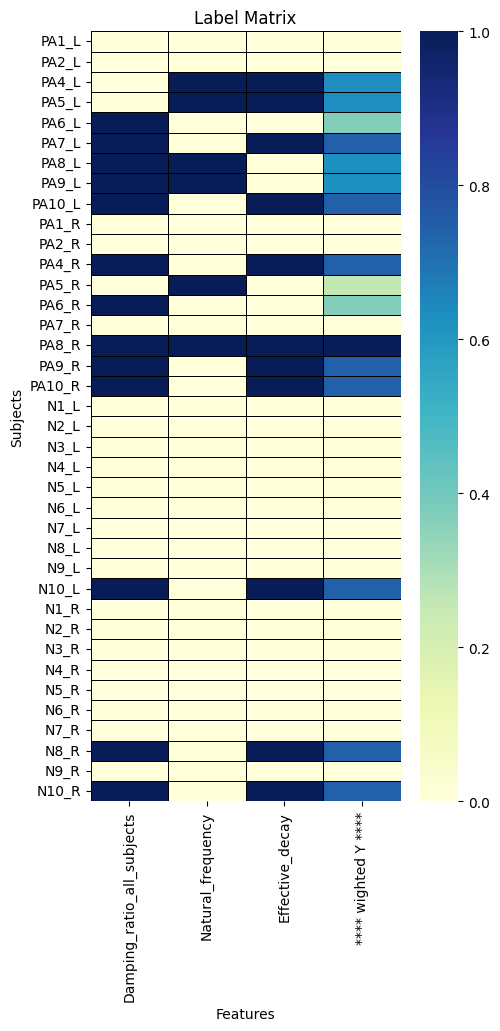

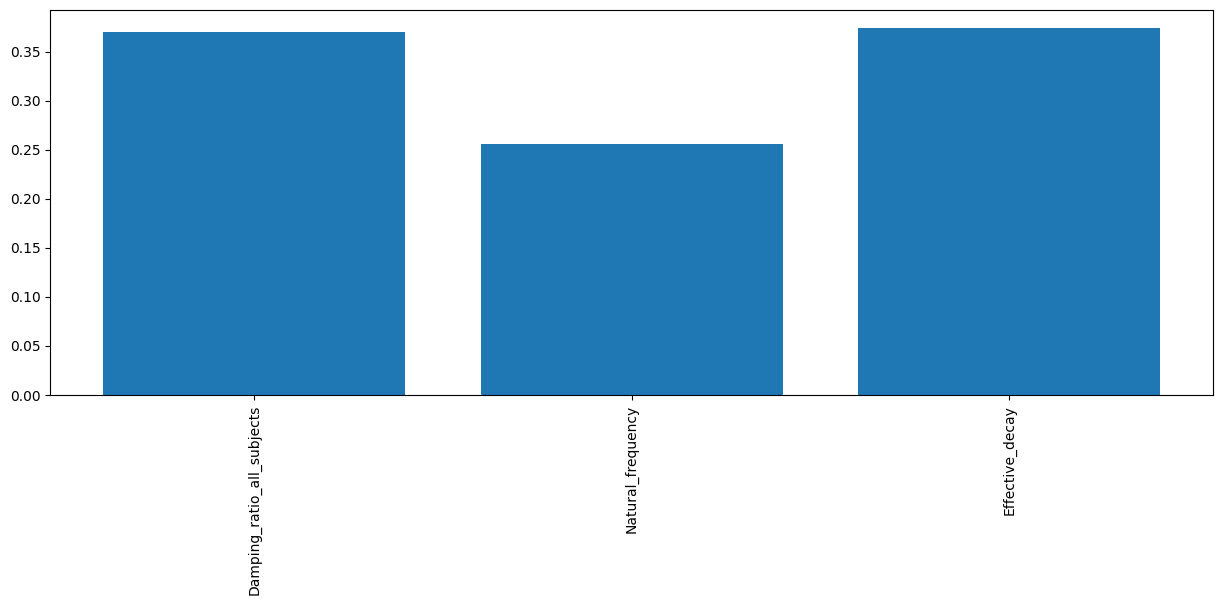

In [ ]:
# Reading features
folder_path = "/content/drive/My Drive/COLAB/Rigidity_WS/Extracted_Features_30HZ.xlsx"
df = pd.read_excel(folder_path)
df.columns=df.iloc[0]
df = df.drop(index=0)
df = df.drop(0, axis=1)

# reading each category
sensor = '2'
PA_Left = data_per_category(df,category='PA',LR='L')
PA_Left_ahmad = PA_Left[['subjects','Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Right_ahmad = PA_Right[['subjects','Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Both_S2 = pd.concat([PA_Left_ahmad,PA_Right_ahmad])

PB_Left = data_per_category(df,category='PB',LR='L')
PB_Left_ahmad = PB_Left[['subjects','Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Right_ahmad = PB_Right[['subjects','Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Both_S2 = pd.concat([PB_Left_ahmad,PB_Right_ahmad]) # both sides of PDs before med

N_Left = data_per_category(df,category='N',LR='L')
N_Left_ahmad = N_Left[['subjects','Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Right_ahmad = N_Right[['subjects','Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Both_S2 = pd.concat([N_Left_ahmad,N_Right_ahmad]) # to have both sides of healthy subjects
# add lefts to rights
PA_Both_S2=pd.DataFrame(PA_Both_S2)
N_Both_S2=pd.DataFrame(N_Both_S2)
PA_Both_S2['Dataset'] = 'PD off_med'
N_Both_S2['Dataset'] = 'Normal'
combined_df = pd.concat([PA_Both_S2, N_Both_S2], axis=0, ignore_index=True) #
Y_true = np.concatenate([np.ones(len(PA_Both_S2)), np.zeros(len(N_Both_S2))])

# Thresholds are set on the average value of Normal subjects

thresholds = (PA_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51
more_or_less = (N_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51



# *******************   Label_matrix   ***********************
label_matrix = np.zeros((len(N_Both_S2)+len(PA_Both_S2),N_Both_S2.shape[1]-2))

# set values of Label matrix
for i in range(len(thresholds)):
    print(i)
    print(thresholds[i])
    print(more_or_less[i])
    if thresholds[i] >= more_or_less[i]:
      # then PDs are those who are more than the threshold and should be labeled as 1
      for j in range(len(combined_df)):
        if combined_df.loc[j][i+1] >= thresholds[i]:
          label_matrix[j][i] = 1
    else:
      for j in range(len(combined_df)):

        if combined_df.loc[j][i+1] < thresholds[i]:
          label_matrix[j][i] = 1

with np.printoptions(threshold=np.inf):
    print(label_matrix)
# -----------

label_model = LabelModel(verbose=True)
label_model.fit(L_train=label_matrix, n_epochs=500, log_freq=100, seed=123)
probs_train = label_model.predict_proba(L=label_matrix)
# weights
weights=label_model.get_weights()
weights/=np.sum(weights)
data_Y=np.sum(weights*label_matrix,axis=1)
print(data_Y)
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(np.c_[label_matrix,data_Y], annot=False, cmap="YlGnBu", fmt=".0f", ax=ax, xticklabels=np.r_[combined_df.drop(columns=['Dataset']).columns.values[1:],['**** wighted Y ****']], yticklabels=combined_df['subjects'],linewidths=0.5, linecolor='black')
ax.set_title("Label Matrix")
ax.set_xlabel("Features")
ax.set_ylabel("Subjects")
plt.show()
# ----
plt.figure(figsize=(15,5))
plt.bar(combined_df.drop(columns=['subjects','Dataset']).columns,weights)
plt.xticks(combined_df.drop(columns=['subjects','Dataset']).columns, rotation=90)
plt.show()

In [ ]:
# both sides of subject
y_pred_tot=np.zeros((len(combined_df)))
for ii in range(int(len(combined_df)/2)):
    print(ii)
    ind = [ii, ii+9]
    if ii>=9:
      ind = [ii+9,ii+9+10]
    print(ind)
    label_model = LabelModel(verbose=False)
    label_matrix_temp=np.delete(label_matrix,ind,0)
    label_model.fit(label_matrix_temp, seed=123)
    weights=label_model.get_weights()
    weights/=np.sum(weights) # نرمالایز کردن وزن ها
    print(weights.shape)

    data_Y=np.sum(weights*label_matrix,axis=1)


    # data_Y_train=np.delete(Y_true,ii,0)
    data_Y_test=data_Y[ind]
    # data_X_train=np.delete(data_X[:,:15],ii,0)
    data_X_test = combined_df.iloc[ind]
    data_X_test = tf.convert_to_tensor(data_X_test.drop(columns=['subjects','Dataset']).values, dtype = tf.float32)
    data_X_train = tf.convert_to_tensor(combined_df.drop(columns=['subjects','Dataset']).values, dtype = tf.float32)
    #data_X_test = data_X_train[ind,:]
    mu=np.mean(data_X_train,axis=0)
    std=np.std(data_X_train,axis=0)
    data_X_train=data_X_train-mu
    data_X_train=data_X_train/std

    data_X_test=data_X_test-mu
    data_X_test=data_X_test/std


    model = keras.models.Sequential()
    model.add(keras.Input(shape=(3,)))
    model.add(keras.layers.Dense(3*2, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(data_X_train,data_Y,batch_size=1,epochs=50,verbose=0)


    y_pred=model.predict(data_X_test)
    y_true=Y_true[ind]

    print(ind,'pred',y_pred,'label',y_true)
    y_pred_tot[ind[0]]=y_pred[0][0]
    y_pred_tot[ind[1]]=y_pred[1][0]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_true,np.round(y_pred_tot))
print('accuracy',accuracy)
from sklearn.metrics import precision_recall_fscore_support
print('Pre Rec F1:',precision_recall_fscore_support(Y_true, np.round(y_pred_tot), average='macro'))


0
[0, 9]


100%|██████████| 100/100 [00:00<00:00, 852.84epoch/s]

(3,)


1/1 [==============================] - 0s 52ms/step
[0, 9] pred [[0.01029568]
 [0.08613653]] label [1. 1.]
1
[1, 10]


100%|██████████| 100/100 [00:00<00:00, 890.17epoch/s]

(3,)


1/1 [==============================] - 0s 51ms/step
[1, 10] pred [[0.0031218 ]
 [0.02148186]] label [1. 1.]
2
[2, 11]


100%|██████████| 100/100 [00:00<00:00, 824.78epoch/s]

(3,)


1/1 [==============================] - 0s 50ms/step
[2, 11] pred [[0.61841357]
 [0.75791776]] label [1. 1.]
3
[3, 12]


100%|██████████| 100/100 [00:00<00:00, 876.33epoch/s]

(3,)


1/1 [==============================] - 0s 49ms/step
[3, 12] pred [[0.70763266]
 [0.2391797 ]] label [1. 1.]
4
[4, 13]


100%|██████████| 100/100 [00:00<00:00, 892.42epoch/s]

(3,)


1/1 [==============================] - 0s 50ms/step
[4, 13] pred [[0.6380114 ]
 [0.14058697]] label [1. 1.]
5
[5, 14]


100%|██████████| 100/100 [00:00<00:00, 863.29epoch/s]

(3,)


1/1 [==============================] - 0s 54ms/step
[5, 14] pred [[0.703036 ]
 [0.0200355]] label [1. 1.]
6
[6, 15]


100%|██████████| 100/100 [00:00<00:00, 905.37epoch/s]

(3,)


1/1 [==============================] - 0s 49ms/step
[6, 15] pred [[0.5830323 ]
 [0.69659734]] label [1. 1.]
7
[7, 16]


100%|██████████| 100/100 [00:00<00:00, 882.41epoch/s]

(3,)


1/1 [==============================] - 0s 53ms/step
[7, 16] pred [[0.63945276]
 [0.5684747 ]] label [1. 1.]
8
[8, 17]


100%|██████████| 100/100 [00:00<00:00, 810.37epoch/s]

(3,)


1/1 [==============================] - 0s 78ms/step
[8, 17] pred [[0.3773794 ]
 [0.68074316]] label [1. 1.]
9
[18, 28]


100%|██████████| 100/100 [00:00<00:00, 625.77epoch/s]

(3,)


1/1 [==============================] - 0s 50ms/step
[18, 28] pred [[0.0035959]
 [0.0030111]] label [0. 0.]
10
[19, 29]


100%|██████████| 100/100 [00:00<00:00, 826.69epoch/s]

(3,)


1/1 [==============================] - 0s 49ms/step
[19, 29] pred [[0.01075153]
 [0.01933218]] label [0. 0.]
11
[20, 30]


100%|██████████| 100/100 [00:00<00:00, 882.93epoch/s]

(3,)


1/1 [==============================] - 0s 53ms/step
[20, 30] pred [[0.03738062]
 [0.00882428]] label [0. 0.]
12
[21, 31]


100%|██████████| 100/100 [00:00<00:00, 879.95epoch/s]

(3,)


1/1 [==============================] - 0s 52ms/step
[21, 31] pred [[0.03739956]
 [0.01192512]] label [0. 0.]
13
[22, 32]


100%|██████████| 100/100 [00:00<00:00, 838.81epoch/s]

(3,)


1/1 [==============================] - 0s 51ms/step
[22, 32] pred [[0.02054394]
 [0.3019229 ]] label [0. 0.]
14
[23, 33]


100%|██████████| 100/100 [00:00<00:00, 888.16epoch/s]

(3,)


1/1 [==============================] - 0s 51ms/step
[23, 33] pred [[0.00671054]
 [0.02511767]] label [0. 0.]
15
[24, 34]


100%|██████████| 100/100 [00:00<00:00, 818.92epoch/s]

(3,)


1/1 [==============================] - 0s 50ms/step
[24, 34] pred [[0.0037339 ]
 [0.00685902]] label [0. 0.]
16
[25, 35]


100%|██████████| 100/100 [00:00<00:00, 831.64epoch/s]

(3,)


1/1 [==============================] - 0s 57ms/step
[25, 35] pred [[0.1117261]
 [0.7171991]] label [0. 0.]
17
[26, 36]


100%|██████████| 100/100 [00:00<00:00, 806.44epoch/s]

(3,)


1/1 [==============================] - 0s 60ms/step
[26, 36] pred [[0.0142101 ]
 [0.01848868]] label [0. 0.]
18
[27, 37]


100%|██████████| 100/100 [00:00<00:00, 839.97epoch/s]

(3,)


1/1 [==============================] - 0s 53ms/step
[27, 37] pred [[0.8205523 ]
 [0.74157405]] label [0. 0.]
accuracy 0.7105263157894737
Pre Rec F1: (0.7246153846153847, 0.7027777777777777, 0.7003584229390681, None)


# considering each side of subjects as independent

## Both Data-Driven and Model-Driven

In [ ]:
# Reading features
folder_path = "/content/drive/My Drive/COLAB/Rigidity_WS/Extracted_Features_30HZ.xlsx"
df = pd.read_excel(folder_path)
df.columns=df.iloc[0]
df = df.drop(index=0)
df = df.drop(0, axis=1)

# reading each category
sensor = '2'
PA_Left = data_per_category(df,category='PA',LR='L')
PA_Left_ahmad = PA_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Left_S2 = filter_columns_by_letter(PA_Left, letter=sensor, position=0) # 9 rows × 49 columns ( one column is names)
PA_Left_S2 = pd.concat([PA_Left_S2, PA_Left_ahmad], axis=1) # 9, 52
PA_Right = data_per_category(df,category='PA',LR='R')
PA_Right_ahmad = PA_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Right_S2 = filter_columns_by_letter(PA_Right, letter=sensor, position=0)
PA_Right_S2 = pd.concat([PA_Right_S2, PA_Right_ahmad], axis=1)
PA_Both_S2 = pd.concat([PA_Left_S2,PA_Right_S2])

PB_Left = data_per_category(df,category='PB',LR='L')
PB_Left_ahmad = PB_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Left_S2 = filter_columns_by_letter(PB_Left, letter=sensor, position=0)
PB_Left_S2 = pd.concat([PB_Left_S2, PB_Left_ahmad], axis=1)
PB_Right = data_per_category(df,category='PB',LR='R')
PB_Right_ahmad = PB_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Right_S2 = filter_columns_by_letter(PB_Right, letter=sensor, position=0)
PB_Right_S2 = pd.concat([PB_Right_S2, PB_Right_ahmad], axis=1)
PB_Both_S2 = pd.concat([PB_Left_S2,PB_Right_S2]) # both sides of PDs before med

N_Left = data_per_category(df,category='N',LR='L')
N_Left_ahmad = N_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Left_S2 = filter_columns_by_letter(N_Left, letter=sensor, position=0)
N_Left_S2 = pd.concat([N_Left_S2, N_Left_ahmad], axis=1)
N_Right = data_per_category(df,category='N',LR='R')
N_Right_ahmad = N_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Right_S2 = filter_columns_by_letter(N_Right, letter=sensor, position=0)
N_Right_S2 = pd.concat([N_Right_S2,N_Right_ahmad], axis=1)
N_Both_S2 = pd.concat([N_Left_S2,N_Right_S2]) # to have both sides of healthy subjects
# add lefts to rights
PA_Both_S2=pd.DataFrame(PA_Both_S2)
N_Both_S2=pd.DataFrame(N_Both_S2)
PA_Both_S2['Dataset'] = 'PD off_med'
N_Both_S2['Dataset'] = 'Normal'
combined_df = pd.concat([PA_Both_S2, N_Both_S2], axis=0, ignore_index=True) # 38,53
Y_true = np.concatenate([np.ones(len(PA_Both_S2)), np.zeros(len(N_Both_S2))])

# Thresholds are set on the average value of Normal subjects

thresholds = (PA_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51
more_or_less = (N_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51



# *******************   Label_matrix   ***********************
label_matrix = np.zeros((len(N_Both_S2)+len(PA_Both_S2),N_Both_S2.shape[1]-2))

# set values of Label matrix
for i in range(len(thresholds)):
    print(i)
    print(thresholds[i])
    print(more_or_less[i])
    if thresholds[i] >= more_or_less[i]:
      # then PDs are those who are more than the threshold and should be labeled as 1
      for j in range(len(combined_df)):
        if combined_df.loc[j][i+1] >= thresholds[i]:
          label_matrix[j][i] = 1
    else:
      for j in range(len(combined_df)):

        if combined_df.loc[j][i+1] < thresholds[i]:
          label_matrix[j][i] = 1

with np.printoptions(threshold=np.inf):
    print(label_matrix)
# -----------

label_model = LabelModel(verbose=True)
label_model.fit(L_train=label_matrix, n_epochs=500, log_freq=100, seed=123)
probs_train = label_model.predict_proba(L=label_matrix)
# weights
weights=label_model.get_weights()
weights/=np.sum(weights)
data_Y=np.sum(weights*label_matrix,axis=1)
# ---------------------
#
y_pred_tot=np.zeros((len(combined_df)))
for ii in range(int(len(combined_df))):
    print(ii)

    label_model = LabelModel(verbose=False)
    label_matrix_temp=np.delete(label_matrix,ii,0)
    label_model.fit(label_matrix_temp, seed=123)
    weights=label_model.get_weights()
    weights/=np.sum(weights) # نرمالایز کردن وزن ها
    print(weights.shape)

    data_Y=np.sum(weights*label_matrix,axis=1)

    # data_Y_train=np.delete(Y_true,ii,0)
    data_Y_test=data_Y[ii:ii+1]
    # data_X_train=np.delete(data_X[:,:15],ii,0)
    data_X_train = tf.convert_to_tensor(combined_df.drop(columns=['subjects','Dataset']).values, dtype = tf.float32)
    data_X_test = data_X_train[ii:ii+1,:]
    mu=np.mean(data_X_train,axis=0)
    std=np.std(data_X_train,axis=0)
    data_X_train=data_X_train-mu
    data_X_train=data_X_train/std

    data_X_test=data_X_test-mu
    data_X_test=data_X_test/std


    model = keras.models.Sequential()
    model.add(keras.Input(shape=(51,)))
    model.add(keras.layers.Dense(100, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(data_X_train,data_Y,batch_size=1,epochs=50,verbose=0)

    y_pred=model.predict(data_X_test)[0]
    y_true=Y_true[ii]

    print(ii,'pred',y_pred,'label',y_true)
    y_pred_tot[ii]=y_pred
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_true,np.round(y_pred_tot))
print('accuracy',accuracy)
from sklearn.metrics import precision_recall_fscore_support
print('Pre Rec F1:',precision_recall_fscore_support(Y_true, np.round(y_pred_tot), average='macro'))



0
259.8517356911974
439.469260918117
1
0.11628236278031623
0.11712260687225613
2
0.07907331558742488
0.09005457614864391
3
0.05149904626634221
0.06188596564689262
4
0.0036705536256241636
0.006817260349421303
5
52.032524558261194
87.95593844001077
6
0.36869740289364966
0.4539483139099155
7
0.023431008220991218
0.016198864580113125
8
588.7493746311343
800.9972224708774
9
0.24111678233165007
0.28747374646565255
10
0.15714781651179968
0.17031111568900317
11
0.10707627622724306
0.11863481670280895
12
0.014737581058857347
0.019331209319279313
13
117.87682534547925
160.34718840628793
14
0.7703533609621313
0.8980429852899384
15
0.02738736678486091
0.023127138081028176
16
472.3423315615242
345.241356121165
17
0.18046725349141265
0.13415293181568502
18
0.13007803367179804
0.07881606635468479
19
0.0848208335264649
0.04883195262280587
20
0.010063045224039151
0.0027836810258758116
21
94.56513785314161
69.1193808727306
22
0.49618512814498583
0.3403284464155584
23
0.014476709312564043
0.0111734161066

100%|██████████| 500/500 [00:00<00:00, 610.30epoch/s]


0


100%|██████████| 100/100 [00:00<00:00, 536.73epoch/s]


(51,)
1/1 [==============================] - 0s 56ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


0 pred [0.44896564] label 1.0
1


100%|██████████| 100/100 [00:00<00:00, 641.73epoch/s]

(51,)


1/1 [==============================] - 0s 81ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


1 pred [0.40984356] label 1.0
2


100%|██████████| 100/100 [00:00<00:00, 424.13epoch/s]


(51,)
1/1 [==============================] - 0s 55ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


2 pred [0.60456] label 1.0
3


100%|██████████| 100/100 [00:00<00:00, 622.37epoch/s]

(51,)


1/1 [==============================] - 0s 57ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


3 pred [0.49546203] label 1.0
4


100%|██████████| 100/100 [00:00<00:00, 616.35epoch/s]

(51,)


1/1 [==============================] - 0s 51ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


4 pred [0.5365694] label 1.0
5


100%|██████████| 100/100 [00:00<00:00, 586.64epoch/s]


(51,)
1/1 [==============================] - 0s 53ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


5 pred [0.6661288] label 1.0
6


100%|██████████| 100/100 [00:00<00:00, 586.38epoch/s]


(51,)
1/1 [==============================] - 0s 75ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


6 pred [0.6359791] label 1.0
7


100%|██████████| 100/100 [00:00<00:00, 449.94epoch/s]


(51,)
1/1 [==============================] - 0s 52ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


7 pred [0.6451299] label 1.0
8


100%|██████████| 100/100 [00:00<00:00, 612.32epoch/s]

(51,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


8 pred [0.65819156] label 1.0
9


100%|██████████| 100/100 [00:00<00:00, 620.07epoch/s]

(51,)


1/1 [==============================] - 0s 53ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


9 pred [0.47218797] label 1.0
10


100%|██████████| 100/100 [00:00<00:00, 637.13epoch/s]

(51,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


10 pred [0.6929379] label 1.0
11


100%|██████████| 100/100 [00:00<00:00, 658.80epoch/s]

(51,)


1/1 [==============================] - 0s 60ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


11 pred [0.714553] label 1.0
12


100%|██████████| 100/100 [00:00<00:00, 663.95epoch/s]

(51,)


1/1 [==============================] - 0s 55ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


12 pred [0.45593926] label 1.0
13


100%|██████████| 100/100 [00:00<00:00, 665.84epoch/s]

(51,)


1/1 [==============================] - 0s 51ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


13 pred [0.7724667] label 1.0
14


100%|██████████| 100/100 [00:00<00:00, 659.98epoch/s]

(51,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


14 pred [0.8178408] label 1.0
15


100%|██████████| 100/100 [00:00<00:00, 632.32epoch/s]

(51,)


1/1 [==============================] - 0s 55ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


15 pred [0.4982984] label 1.0
16


100%|██████████| 100/100 [00:00<00:00, 594.34epoch/s]

(51,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


16 pred [0.568463] label 1.0
17


100%|██████████| 100/100 [00:00<00:00, 652.68epoch/s]

(51,)


1/1 [==============================] - 0s 73ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


17 pred [0.4576132] label 1.0
18


100%|██████████| 100/100 [00:00<00:00, 416.89epoch/s]


(51,)
1/1 [==============================] - 0s 51ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


18 pred [0.37638023] label 0.0
19


100%|██████████| 100/100 [00:00<00:00, 645.37epoch/s]

(51,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


19 pred [0.23612115] label 0.0
20


100%|██████████| 100/100 [00:00<00:00, 659.28epoch/s]

(51,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


20 pred [0.3000684] label 0.0
21


100%|██████████| 100/100 [00:00<00:00, 669.18epoch/s]

(51,)


1/1 [==============================] - 0s 49ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


21 pred [0.27164015] label 0.0
22


100%|██████████| 100/100 [00:00<00:00, 601.48epoch/s]

(51,)


1/1 [==============================] - 0s 51ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


22 pred [0.38190153] label 0.0
23


100%|██████████| 100/100 [00:00<00:00, 652.87epoch/s]

(51,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


23 pred [0.3109479] label 0.0
24


100%|██████████| 100/100 [00:00<00:00, 650.59epoch/s]

(51,)


1/1 [==============================] - 0s 59ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


24 pred [0.49548167] label 0.0
25


100%|██████████| 100/100 [00:00<00:00, 666.75epoch/s]

(51,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


25 pred [0.28019512] label 0.0
26


100%|██████████| 100/100 [00:00<00:00, 603.85epoch/s]

(51,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


26 pred [0.51506424] label 0.0
27


100%|██████████| 100/100 [00:00<00:00, 601.60epoch/s]

(51,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


27 pred [0.63981974] label 0.0
28


100%|██████████| 100/100 [00:00<00:00, 671.77epoch/s]

(51,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


28 pred [0.4340885] label 0.0
29


100%|██████████| 100/100 [00:00<00:00, 676.42epoch/s]

(51,)


1/1 [==============================] - 0s 77ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


29 pred [0.35718066] label 0.0
30


100%|██████████| 100/100 [00:00<00:00, 559.89epoch/s]


(51,)
1/1 [==============================] - 0s 49ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


30 pred [0.43983015] label 0.0
31


100%|██████████| 100/100 [00:00<00:00, 655.10epoch/s]

(51,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


31 pred [0.40711594] label 0.0
32


100%|██████████| 100/100 [00:00<00:00, 673.51epoch/s]

(51,)


1/1 [==============================] - 0s 51ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


32 pred [0.48220932] label 0.0
33


100%|██████████| 100/100 [00:00<00:00, 620.15epoch/s]

(51,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


33 pred [0.3735066] label 0.0
34


100%|██████████| 100/100 [00:00<00:00, 663.99epoch/s]

(51,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


34 pred [0.31417078] label 0.0
35


100%|██████████| 100/100 [00:00<00:00, 621.48epoch/s]

(51,)


1/1 [==============================] - 0s 49ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


35 pred [0.49932483] label 0.0
36


100%|██████████| 100/100 [00:00<00:00, 625.54epoch/s]

(51,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


36 pred [0.31976515] label 0.0
37


100%|██████████| 100/100 [00:00<00:00, 650.91epoch/s]

(51,)


1/1 [==============================] - 0s 51ms/step
37 pred [0.5926031] label 0.0
accuracy 0.7368421052631579
Pre Rec F1: (0.7470238095238095, 0.7305555555555556, 0.7301136363636365, None)


<ipython-input-20-6c7958aa21db>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


## Only Data-Driven

In [ ]:
# Reading features
folder_path = "/content/drive/My Drive/COLAB/Rigidity_WS/Extracted_Features_30HZ.xlsx"
df = pd.read_excel(folder_path)
df.columns=df.iloc[0]
df = df.drop(index=0)
df = df.drop(0, axis=1)

# reading each category
sensor = '2'
PA_Left = data_per_category(df,category='PA',LR='L')
PA_Left_ahmad = PA_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Left_S2 = filter_columns_by_letter(PA_Left, letter=sensor, position=0) # 9 rows × 49 columns ( one column is names)
#PA_Left_S2 = pd.concat([PA_Left_S2, PA_Left_ahmad], axis=1) # 9, 52
PA_Right = data_per_category(df,category='PA',LR='R')
PA_Right_ahmad = PA_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Right_S2 = filter_columns_by_letter(PA_Right, letter=sensor, position=0)
#PA_Right_S2 = pd.concat([PA_Right_S2, PA_Right_ahmad], axis=1)
PA_Both_S2 = pd.concat([PA_Left_S2,PA_Right_S2])

PB_Left = data_per_category(df,category='PB',LR='L')
PB_Left_ahmad = PB_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Left_S2 = filter_columns_by_letter(PB_Left, letter=sensor, position=0)
#PB_Left_S2 = pd.concat([PB_Left_S2, PB_Left_ahmad], axis=1)
PB_Right = data_per_category(df,category='PB',LR='R')
PB_Right_ahmad = PB_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Right_S2 = filter_columns_by_letter(PB_Right, letter=sensor, position=0)
#PB_Right_S2 = pd.concat([PB_Right_S2, PB_Right_ahmad], axis=1)
PB_Both_S2 = pd.concat([PB_Left_S2,PB_Right_S2]) # both sides of PDs before med

N_Left = data_per_category(df,category='N',LR='L')
N_Left_ahmad = N_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Left_S2 = filter_columns_by_letter(N_Left, letter=sensor, position=0)
#N_Left_S2 = pd.concat([N_Left_S2, N_Left_ahmad], axis=1)
N_Right = data_per_category(df,category='N',LR='R')
N_Right_ahmad = N_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Right_S2 = filter_columns_by_letter(N_Right, letter=sensor, position=0)
#N_Right_S2 = pd.concat([N_Right_S2,N_Right_ahmad], axis=1)
N_Both_S2 = pd.concat([N_Left_S2,N_Right_S2]) # to have both sides of healthy subjects
# add lefts to rights
PA_Both_S2=pd.DataFrame(PA_Both_S2)
N_Both_S2=pd.DataFrame(N_Both_S2)
PA_Both_S2['Dataset'] = 'PD off_med'
N_Both_S2['Dataset'] = 'Normal'
combined_df = pd.concat([PA_Both_S2, N_Both_S2], axis=0, ignore_index=True) # 38,53
Y_true = np.concatenate([np.ones(len(PA_Both_S2)), np.zeros(len(N_Both_S2))])

# Thresholds are set on the average value of Normal subjects

thresholds = (PA_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51
more_or_less = (N_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51



# *******************   Label_matrix   ***********************
label_matrix = np.zeros((len(N_Both_S2)+len(PA_Both_S2),N_Both_S2.shape[1]-2))

# set values of Label matrix
for i in range(len(thresholds)):
    print(i)
    print(thresholds[i])
    print(more_or_less[i])
    if thresholds[i] >= more_or_less[i]:
      # then PDs are those who are more than the threshold and should be labeled as 1
      for j in range(len(combined_df)):
        if combined_df.loc[j][i+1] >= thresholds[i]:
          label_matrix[j][i] = 1
    else:
      for j in range(len(combined_df)):

        if combined_df.loc[j][i+1] < thresholds[i]:
          label_matrix[j][i] = 1

with np.printoptions(threshold=np.inf):
    print(label_matrix)
# -----------

label_model = LabelModel(verbose=True)
label_model.fit(L_train=label_matrix, n_epochs=500, log_freq=100, seed=123)
probs_train = label_model.predict_proba(L=label_matrix)
# weights
weights=label_model.get_weights()
weights/=np.sum(weights)
data_Y=np.sum(weights*label_matrix,axis=1)
# ---------------------
#
y_pred_tot=np.zeros((len(combined_df)))
for ii in range(int(len(combined_df))):
    print(ii)

    label_model = LabelModel(verbose=False)
    label_matrix_temp=np.delete(label_matrix,ii,0)
    label_model.fit(label_matrix_temp, seed=123)
    weights=label_model.get_weights()
    weights/=np.sum(weights) # نرمالایز کردن وزن ها
    print(weights.shape)

    data_Y=np.sum(weights*label_matrix,axis=1)

    # data_Y_train=np.delete(Y_true,ii,0)
    data_Y_test=data_Y[ii:ii+1]
    # data_X_train=np.delete(data_X[:,:15],ii,0)
    data_X_train = tf.convert_to_tensor(combined_df.drop(columns=['subjects','Dataset']).values, dtype = tf.float32)
    data_X_test = data_X_train[ii:ii+1,:]
    mu=np.mean(data_X_train,axis=0)
    std=np.std(data_X_train,axis=0)
    data_X_train=data_X_train-mu
    data_X_train=data_X_train/std

    data_X_test=data_X_test-mu
    data_X_test=data_X_test/std


    model = keras.models.Sequential()
    model.add(keras.Input(shape=(48,)))
    model.add(keras.layers.Dense(48*2, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(data_X_train,data_Y,batch_size=1,epochs=50,verbose=0)

    y_pred=model.predict(data_X_test)[0]
    y_true=Y_true[ii]

    print(ii,'pred',y_pred,'label',y_true)
    y_pred_tot[ii]=y_pred
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_true,np.round(y_pred_tot))
print('accuracy',accuracy)
from sklearn.metrics import precision_recall_fscore_support
print('Pre Rec F1:',precision_recall_fscore_support(Y_true, np.round(y_pred_tot), average='macro'))



0
259.8517356911974
439.469260918117
1
0.11628236278031623
0.11712260687225613
2
0.07907331558742488
0.09005457614864391
3
0.05149904626634221
0.06188596564689262
4
0.0036705536256241636
0.006817260349421303
5
52.032524558261194
87.95593844001077
6
0.36869740289364966
0.4539483139099155
7
0.023431008220991218
0.016198864580113125
8
588.7493746311343
800.9972224708774
9
0.24111678233165007
0.28747374646565255
10
0.15714781651179968
0.17031111568900317
11
0.10707627622724306
0.11863481670280895
12
0.014737581058857347
0.019331209319279313
13
117.87682534547925
160.34718840628793
14
0.7703533609621313
0.8980429852899384
15
0.02738736678486091
0.023127138081028176
16
472.3423315615242
345.241356121165
17
0.18046725349141265
0.13415293181568502
18
0.13007803367179804
0.07881606635468479
19
0.0848208335264649
0.04883195262280587
20
0.010063045224039151
0.0027836810258758116
21
94.56513785314161
69.1193808727306
22
0.49618512814498583
0.3403284464155584
23
0.014476709312564043
0.0111734161066

100%|██████████| 500/500 [00:00<00:00, 620.89epoch/s]


0


100%|██████████| 100/100 [00:00<00:00, 511.61epoch/s]


(48,)
1/1 [==============================] - 0s 58ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


0 pred [0.39587155] label 1.0
1


100%|██████████| 100/100 [00:00<00:00, 652.72epoch/s]

(48,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


1 pred [0.47172004] label 1.0
2


100%|██████████| 100/100 [00:00<00:00, 659.92epoch/s]

(48,)


1/1 [==============================] - 0s 51ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


2 pred [0.72035027] label 1.0
3


100%|██████████| 100/100 [00:00<00:00, 622.97epoch/s]

(48,)


1/1 [==============================] - 0s 85ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


3 pred [0.49643806] label 1.0
4


100%|██████████| 100/100 [00:00<00:00, 417.45epoch/s]


(48,)
1/1 [==============================] - 0s 59ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


4 pred [0.5910328] label 1.0
5


100%|██████████| 100/100 [00:00<00:00, 642.82epoch/s]

(48,)


1/1 [==============================] - 0s 51ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


5 pred [0.7068251] label 1.0
6


100%|██████████| 100/100 [00:00<00:00, 665.91epoch/s]

(48,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


6 pred [0.66091377] label 1.0
7


100%|██████████| 100/100 [00:00<00:00, 674.60epoch/s]

(48,)


1/1 [==============================] - 0s 53ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


7 pred [0.6321468] label 1.0
8


100%|██████████| 100/100 [00:00<00:00, 634.03epoch/s]

(48,)


1/1 [==============================] - 0s 81ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


8 pred [0.6569207] label 1.0
9


100%|██████████| 100/100 [00:00<00:00, 463.75epoch/s]


(48,)
1/1 [==============================] - 0s 51ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


9 pred [0.637905] label 1.0
10


100%|██████████| 100/100 [00:00<00:00, 681.96epoch/s]

(48,)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


10 pred [0.7525256] label 1.0
11


100%|██████████| 100/100 [00:00<00:00, 661.62epoch/s]

(48,)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


11 pred [0.726877] label 1.0
12


100%|██████████| 100/100 [00:00<00:00, 664.63epoch/s]

(48,)


1/1 [==============================] - 0s 51ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


12 pred [0.46033418] label 1.0
13


100%|██████████| 100/100 [00:00<00:00, 637.00epoch/s]

(48,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


13 pred [0.81161284] label 1.0
14


100%|██████████| 100/100 [00:00<00:00, 670.57epoch/s]

(48,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


14 pred [0.8794806] label 1.0
15


100%|██████████| 100/100 [00:00<00:00, 672.46epoch/s]

(48,)


1/1 [==============================] - 0s 48ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


15 pred [0.46528196] label 1.0
16


100%|██████████| 100/100 [00:00<00:00, 649.16epoch/s]

(48,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


16 pred [0.5229827] label 1.0
17


100%|██████████| 100/100 [00:00<00:00, 632.86epoch/s]

(48,)


1/1 [==============================] - 0s 48ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


17 pred [0.44794324] label 1.0
18


100%|██████████| 100/100 [00:00<00:00, 657.61epoch/s]

(48,)


1/1 [==============================] - 0s 57ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


18 pred [0.45410168] label 0.0
19


100%|██████████| 100/100 [00:00<00:00, 683.49epoch/s]

(48,)


1/1 [==============================] - 0s 51ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


19 pred [0.2682344] label 0.0
20


100%|██████████| 100/100 [00:00<00:00, 652.42epoch/s]

(48,)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


20 pred [0.31393468] label 0.0
21


100%|██████████| 100/100 [00:00<00:00, 701.94epoch/s]

(48,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


21 pred [0.3194977] label 0.0
22


100%|██████████| 100/100 [00:00<00:00, 667.27epoch/s]

(48,)


1/1 [==============================] - 0s 61ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


22 pred [0.46449822] label 0.0
23


100%|██████████| 100/100 [00:00<00:00, 670.44epoch/s]

(48,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


23 pred [0.35696465] label 0.0
24


100%|██████████| 100/100 [00:00<00:00, 627.37epoch/s]

(48,)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


24 pred [0.5847943] label 0.0
25


100%|██████████| 100/100 [00:00<00:00, 666.29epoch/s]

(48,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


25 pred [0.31940463] label 0.0
26


100%|██████████| 100/100 [00:00<00:00, 690.60epoch/s]

(48,)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


26 pred [0.5791044] label 0.0
27


100%|██████████| 100/100 [00:00<00:00, 669.19epoch/s]

(48,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


27 pred [0.63451165] label 0.0
28


100%|██████████| 100/100 [00:00<00:00, 617.19epoch/s]

(48,)


1/1 [==============================] - 0s 73ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


28 pred [0.48482832] label 0.0
29


100%|██████████| 100/100 [00:00<00:00, 484.06epoch/s]


(48,)
1/1 [==============================] - 0s 50ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


29 pred [0.32461396] label 0.0
30


100%|██████████| 100/100 [00:00<00:00, 637.55epoch/s]

(48,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


30 pred [0.47873017] label 0.0
31


100%|██████████| 100/100 [00:00<00:00, 663.04epoch/s]

(48,)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


31 pred [0.4445596] label 0.0
32


100%|██████████| 100/100 [00:00<00:00, 682.50epoch/s]

(48,)


1/1 [==============================] - 0s 93ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


32 pred [0.47527245] label 0.0
33


100%|██████████| 100/100 [00:00<00:00, 461.42epoch/s]


(48,)
1/1 [==============================] - 0s 52ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


33 pred [0.4023464] label 0.0
34


100%|██████████| 100/100 [00:00<00:00, 628.56epoch/s]

(48,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


34 pred [0.37838352] label 0.0
35


100%|██████████| 100/100 [00:00<00:00, 673.77epoch/s]

(48,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


35 pred [0.45234442] label 0.0
36


100%|██████████| 100/100 [00:00<00:00, 679.63epoch/s]

(48,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


36 pred [0.36971688] label 0.0
37


100%|██████████| 100/100 [00:00<00:00, 647.46epoch/s]

(48,)


1/1 [==============================] - 0s 60ms/step
37 pred [0.5900735] label 0.0
accuracy 0.7368421052631579
Pre Rec F1: (0.7386363636363636, 0.7333333333333334, 0.7338935574229692, None)


<ipython-input-21-3cb814a61eba>:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


## only Model-Driven

In [ ]:
# Reading features
folder_path = "/content/drive/My Drive/COLAB/Rigidity_WS/Extracted_Features_30HZ.xlsx"
df = pd.read_excel(folder_path)
df.columns=df.iloc[0]
df = df.drop(index=0)
df = df.drop(0, axis=1)

# reading each category
sensor = '2'
PA_Left = data_per_category(df,category='PA',LR='L')
PA_Left_ahmad = PA_Left[['subjects','Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Right_ahmad = PA_Right[['subjects','Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Both_S2 = pd.concat([PA_Left_ahmad,PA_Right_ahmad])

PB_Left = data_per_category(df,category='PB',LR='L')
PB_Left_ahmad = PB_Left[['subjects','Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Right_ahmad = PB_Right[['subjects','Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Both_S2 = pd.concat([PB_Left_ahmad,PB_Right_ahmad]) # both sides of PDs before med

N_Left = data_per_category(df,category='N',LR='L')
N_Left_ahmad = N_Left[['subjects','Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Right_ahmad = N_Right[['subjects','Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Both_S2 = pd.concat([N_Left_ahmad,N_Right_ahmad]) # to have both sides of healthy subjects
# add lefts to rights
PA_Both_S2=pd.DataFrame(PA_Both_S2)
N_Both_S2=pd.DataFrame(N_Both_S2)
PA_Both_S2['Dataset'] = 'PD off_med'
N_Both_S2['Dataset'] = 'Normal'
combined_df = pd.concat([PA_Both_S2, N_Both_S2], axis=0, ignore_index=True) #
Y_true = np.concatenate([np.ones(len(PA_Both_S2)), np.zeros(len(N_Both_S2))])

# Thresholds are set on the average value of Normal subjects

thresholds = (PA_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51
more_or_less = (N_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51



# *******************   Label_matrix   ***********************
label_matrix = np.zeros((len(N_Both_S2)+len(PA_Both_S2),N_Both_S2.shape[1]-2))

# set values of Label matrix
for i in range(len(thresholds)):
    print(i)
    print(thresholds[i])
    print(more_or_less[i])
    if thresholds[i] >= more_or_less[i]:
      # then PDs are those who are more than the threshold and should be labeled as 1
      for j in range(len(combined_df)):
        if combined_df.loc[j][i+1] >= thresholds[i]:
          label_matrix[j][i] = 1
    else:
      for j in range(len(combined_df)):

        if combined_df.loc[j][i+1] < thresholds[i]:
          label_matrix[j][i] = 1

with np.printoptions(threshold=np.inf):
    print(label_matrix)
# -----------

label_model = LabelModel(verbose=True)
label_model.fit(L_train=label_matrix, n_epochs=500, log_freq=100, seed=123)
probs_train = label_model.predict_proba(L=label_matrix)
# weights
weights=label_model.get_weights()
weights/=np.sum(weights)
data_Y=np.sum(weights*label_matrix,axis=1)
# ---------------------
#
y_pred_tot=np.zeros((len(combined_df)))
for ii in range(int(len(combined_df))):
    print(ii)

    label_model = LabelModel(verbose=False)
    label_matrix_temp=np.delete(label_matrix,ii,0)
    label_model.fit(label_matrix_temp, seed=123)
    weights=label_model.get_weights()
    weights/=np.sum(weights) # نرمالایز کردن وزن ها
    print(weights.shape)

    data_Y=np.sum(weights*label_matrix,axis=1)

    # data_Y_train=np.delete(Y_true,ii,0)
    data_Y_test=data_Y[ii:ii+1]
    # data_X_train=np.delete(data_X[:,:15],ii,0)
    data_X_train = tf.convert_to_tensor(combined_df.drop(columns=['subjects','Dataset']).values, dtype = tf.float32)
    data_X_test = data_X_train[ii:ii+1,:]
    mu=np.mean(data_X_train,axis=0)
    std=np.std(data_X_train,axis=0)
    data_X_train=data_X_train-mu
    data_X_train=data_X_train/std

    data_X_test=data_X_test-mu
    data_X_test=data_X_test/std


    model = keras.models.Sequential()
    model.add(keras.Input(shape=(3,)))
    model.add(keras.layers.Dense(3*2, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(data_X_train,data_Y,batch_size=1,epochs=50,verbose=0)

    y_pred=model.predict(data_X_test)[0]
    y_true=Y_true[ii]

    print(ii,'pred',y_pred,'label',y_true)
    y_pred_tot[ii]=y_pred
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_true,np.round(y_pred_tot))
print('accuracy',accuracy)
from sklearn.metrics import precision_recall_fscore_support
print('Pre Rec F1:',precision_recall_fscore_support(Y_true, np.round(y_pred_tot), average='macro'))



0
0.27781111111111106
0.18116
1
5.956749999999999
5.43895
2
1.5554659499999997
0.9821558595
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 1.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 1.]
 [0. 0. 0.]
 [1. 0. 1.]]


100%|██████████| 500/500 [00:00<00:00, 897.91epoch/s]


0


100%|██████████| 100/100 [00:00<00:00, 908.66epoch/s]


(3,)
1/1 [==============================] - 0s 51ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


0 pred [0.01020761] label 1.0
1


100%|██████████| 100/100 [00:00<00:00, 890.51epoch/s]

(3,)


1/1 [==============================] - 0s 73ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


1 pred [0.00310411] label 1.0
2


100%|██████████| 100/100 [00:00<00:00, 588.12epoch/s]

(3,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


2 pred [0.6169924] label 1.0
3


100%|██████████| 100/100 [00:00<00:00, 887.89epoch/s]

(3,)


1/1 [==============================] - 0s 55ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


3 pred [0.7067151] label 1.0
4


100%|██████████| 100/100 [00:00<00:00, 893.23epoch/s]

(3,)


1/1 [==============================] - 0s 49ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


4 pred [0.6406036] label 1.0
5


100%|██████████| 100/100 [00:00<00:00, 893.66epoch/s]

(3,)


1/1 [==============================] - 0s 49ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


5 pred [0.70394874] label 1.0
6


100%|██████████| 100/100 [00:00<00:00, 892.14epoch/s]

(3,)


1/1 [==============================] - 0s 51ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


6 pred [0.5725004] label 1.0
7


100%|██████████| 100/100 [00:00<00:00, 839.07epoch/s]

(3,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


7 pred [0.6350262] label 1.0
8


100%|██████████| 100/100 [00:00<00:00, 804.97epoch/s]

(3,)


1/1 [==============================] - 0s 67ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


8 pred [0.38025385] label 1.0
9


100%|██████████| 100/100 [00:00<00:00, 766.25epoch/s]

(3,)


1/1 [==============================] - 0s 82ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


9 pred [0.08543999] label 1.0
10


100%|██████████| 100/100 [00:00<00:00, 463.82epoch/s]


(3,)
1/1 [==============================] - 0s 54ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


10 pred [0.02135035] label 1.0
11


100%|██████████| 100/100 [00:00<00:00, 873.93epoch/s]

(3,)


1/1 [==============================] - 0s 60ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


11 pred [0.75479674] label 1.0
12


100%|██████████| 100/100 [00:00<00:00, 829.68epoch/s]

(3,)


1/1 [==============================] - 0s 84ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


12 pred [0.24303097] label 1.0
13


100%|██████████| 100/100 [00:00<00:00, 639.99epoch/s]

(3,)


1/1 [==============================] - 0s 54ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


13 pred [0.14170016] label 1.0
14


100%|██████████| 100/100 [00:00<00:00, 865.13epoch/s]

(3,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


14 pred [0.01996221] label 1.0
15


100%|██████████| 100/100 [00:00<00:00, 840.29epoch/s]

(3,)


1/1 [==============================] - 0s 55ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


15 pred [0.69141734] label 1.0
16


100%|██████████| 100/100 [00:00<00:00, 885.77epoch/s]

(3,)


1/1 [==============================] - 0s 76ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


16 pred [0.5635052] label 1.0
17


100%|██████████| 100/100 [00:00<00:00, 576.52epoch/s]

(3,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


17 pred [0.6863547] label 1.0
18


100%|██████████| 100/100 [00:00<00:00, 855.37epoch/s]

(3,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


18 pred [0.00357352] label 0.0
19


100%|██████████| 100/100 [00:00<00:00, 854.84epoch/s]

(3,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


19 pred [0.01072168] label 0.0
20


100%|██████████| 100/100 [00:00<00:00, 830.53epoch/s]

(3,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


20 pred [0.03735041] label 0.0
21


100%|██████████| 100/100 [00:00<00:00, 859.54epoch/s]

(3,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


21 pred [0.03672392] label 0.0
22


100%|██████████| 100/100 [00:00<00:00, 795.91epoch/s]

(3,)


1/1 [==============================] - 0s 53ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


22 pred [0.02056875] label 0.0
23


100%|██████████| 100/100 [00:00<00:00, 855.58epoch/s]

(3,)


1/1 [==============================] - 0s 51ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


23 pred [0.00661176] label 0.0
24


100%|██████████| 100/100 [00:00<00:00, 901.97epoch/s]

(3,)


1/1 [==============================] - 0s 73ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


24 pred [0.00370122] label 0.0
25


100%|██████████| 100/100 [00:00<00:00, 613.05epoch/s]

(3,)


1/1 [==============================] - 0s 49ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


25 pred [0.11209846] label 0.0
26


100%|██████████| 100/100 [00:00<00:00, 871.83epoch/s]

(3,)


1/1 [==============================] - 0s 51ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


26 pred [0.01399151] label 0.0
27


100%|██████████| 100/100 [00:00<00:00, 864.92epoch/s]

(3,)


1/1 [==============================] - 0s 49ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


27 pred [0.8274388] label 0.0
28


100%|██████████| 100/100 [00:00<00:00, 860.46epoch/s]

(3,)


1/1 [==============================] - 0s 54ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


28 pred [0.00301013] label 0.0
29


100%|██████████| 100/100 [00:00<00:00, 795.04epoch/s]

(3,)


1/1 [==============================] - 0s 53ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


29 pred [0.01942055] label 0.0
30


100%|██████████| 100/100 [00:00<00:00, 894.11epoch/s]

(3,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


30 pred [0.00884994] label 0.0
31


100%|██████████| 100/100 [00:00<00:00, 847.00epoch/s]

(3,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


31 pred [0.01179881] label 0.0
32


100%|██████████| 100/100 [00:00<00:00, 883.52epoch/s]

(3,)


1/1 [==============================] - 0s 50ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


32 pred [0.29991728] label 0.0
33


100%|██████████| 100/100 [00:00<00:00, 877.17epoch/s]

(3,)


1/1 [==============================] - 0s 51ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


33 pred [0.02496079] label 0.0
34


100%|██████████| 100/100 [00:00<00:00, 878.59epoch/s]

(3,)


1/1 [==============================] - 0s 74ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


34 pred [0.00687215] label 0.0
35


100%|██████████| 100/100 [00:00<00:00, 647.50epoch/s]

(3,)


1/1 [==============================] - 0s 52ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


35 pred [0.7061417] label 0.0
36


100%|██████████| 100/100 [00:00<00:00, 878.33epoch/s]

(3,)


1/1 [==============================] - 0s 53ms/step


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


36 pred [0.01837561] label 0.0
37


100%|██████████| 100/100 [00:00<00:00, 885.37epoch/s]

(3,)


1/1 [==============================] - 0s 50ms/step
37 pred [0.74986494] label 0.0
accuracy 0.7105263157894737
Pre Rec F1: (0.7246153846153847, 0.7027777777777777, 0.7003584229390681, None)


<ipython-input-22-aec7383468bd>:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_tot[ii]=y_pred


#  Complementary Visualizations

In [ ]:
def data_per_category(df,category, LR):
  dataframes_for_category = df[df['subjects'].str.contains(category) & df['subjects'].str.contains(LR)]
  return dataframes_for_category
def filter_columns_by_letter(df, letter, position):
    selected_columns = ['subjects'] + [col for col in df.columns if len(col) > position and col[position] == letter]
    return df[selected_columns]
# Reading features
folder_path = "/content/drive/My Drive/COLAB/Rigidity_WS/Extracted_Features_30HZ.xlsx"
df = pd.read_excel(folder_path)
df.columns=df.iloc[0]
df = df.drop(index=0)
df = df.drop(0, axis=1)
sensor = '2'
PA_Left = data_per_category(df,category='PA',LR='L')
PA_Left_ahmad = PA_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Left_S2 = filter_columns_by_letter(PA_Left, letter=sensor, position=0) # 9 rows × 49 columns ( one column is names)
PA_Left_S2 = pd.concat([PA_Left_S2, PA_Left_ahmad], axis=1) # 9, 52
PA_Right = data_per_category(df,category='PA',LR='R')
PA_Right_ahmad = PA_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PA_Right_S2 = filter_columns_by_letter(PA_Right, letter=sensor, position=0)
PA_Right_S2 = pd.concat([PA_Right_S2, PA_Right_ahmad], axis=1)
PA_Both_S2 = pd.concat([PA_Left_S2,PA_Right_S2])

PB_Left = data_per_category(df,category='PB',LR='L')
PB_Left_ahmad = PB_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Left_S2 = filter_columns_by_letter(PB_Left, letter=sensor, position=0)
PB_Left_S2 = pd.concat([PB_Left_S2, PB_Left_ahmad], axis=1)
PB_Right = data_per_category(df,category='PB',LR='R')
PB_Right_ahmad = PB_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
PB_Right_S2 = filter_columns_by_letter(PB_Right, letter=sensor, position=0)
PB_Right_S2 = pd.concat([PB_Right_S2, PB_Right_ahmad], axis=1)
PB_Both_S2 = pd.concat([PB_Left_S2,PB_Right_S2]) # both sides of PDs before med

N_Left = data_per_category(df,category='N',LR='L')
N_Left_ahmad = N_Left[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Left_S2 = filter_columns_by_letter(N_Left, letter=sensor, position=0)
N_Left_S2 = pd.concat([N_Left_S2, N_Left_ahmad], axis=1)
N_Right = data_per_category(df,category='N',LR='R')
N_Right_ahmad = N_Right[['Damping_ratio_all_subjects','Natural_frequency','Effective_decay']]
N_Right_S2 = filter_columns_by_letter(N_Right, letter=sensor, position=0)
N_Right_S2 = pd.concat([N_Right_S2,N_Right_ahmad], axis=1)
N_Both_S2 = pd.concat([N_Left_S2,N_Right_S2]) # to have both sides of healthy subjects
# add lefts to rights
PA_Both_S2=pd.DataFrame(PA_Both_S2)
N_Both_S2=pd.DataFrame(N_Both_S2)
PA_Both_S2['Dataset'] = 'PD off_med'
N_Both_S2['Dataset'] = 'Normal'
combined_df = pd.concat([PA_Both_S2, N_Both_S2], axis=0, ignore_index=True) # 38,53
Y_true = np.concatenate([np.ones(len(PA_Both_S2)), np.zeros(len(N_Both_S2))])
# Thresholds are set on the average value of Normal subjects
thresholds = (PA_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51
more_or_less = (N_Both_S2.drop(['subjects','Dataset'],axis=1)).mean(axis=0) # 51
# *******************   Label_matrix   ***********************
label_matrix = np.zeros((len(N_Both_S2)+len(PA_Both_S2),N_Both_S2.shape[1]-2))

# set values of Label matrix
for i in range(len(thresholds)):
    if thresholds[i] >= more_or_less[i]:
      # then PDs are those who are more than the threshold and should be labeled as 1
      for j in range(len(combined_df)):
        if combined_df.loc[j][i+1] >= thresholds[i]:
          label_matrix[j][i] = 1
    else:
      for j in range(len(combined_df)):

        if combined_df.loc[j][i+1] < thresholds[i]:
          label_matrix[j][i] = 1
# -----------
label_model = LabelModel(verbose=True)
label_model.fit(L_train=label_matrix, n_epochs=500, log_freq=100, seed=123)
probs_train = label_model.predict_proba(L=label_matrix)
# weights
weights=label_model.get_weights()
weights/=np.sum(weights) # normalizing weights
data_Y=np.sum(weights*label_matrix,axis=1)

# ============================================================> all data is used for training
# ============================================================> both sides of subject
y_pred_tot=np.zeros((len(combined_df)))
data_X_train = tf.convert_to_tensor(combined_df.drop(columns=['subjects','Dataset']).values, dtype = tf.float32)
#data_X_test = data_X_train[ind,:]
mu=np.mean(data_X_train,axis=0)
std=np.std(data_X_train,axis=0)
data_X_train=data_X_train-mu
data_X_train=data_X_train/std
seed = 124
tf.random.set_seed(seed)
model = keras.models.Sequential()
model.add(keras.Input(shape=(51,)))
model.add(keras.layers.Dense(51*2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(data_X_train,data_Y,batch_size=1,epochs=50,verbose=0)

y_pred=model.predict(data_X_train)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_true,np.round(y_pred))
print('accuracy',accuracy)
from sklearn.metrics import precision_recall_fscore_support
print('Pre Rec F1:',precision_recall_fscore_support(Y_true, np.round(y_pred), average='macro'))

<ipython-input-39-4cb4a6b6b031>:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if thresholds[i] >= more_or_less[i]:
<ipython-input-39-4cb4a6b6b031>:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if combined_df.loc[j][i+1] < thresholds[i]:
<ipython-input-39-4cb4a6b6b031>:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if combined_df.loc[j][i+1] >= thresholds[i]:
100%|██████████| 500/500 [00:00<00:00, 562.89epoch/s]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
accuracy 0.8157894736842105
Pre Rec F1: (0.8157894736842105, 0.8166666666666667, 0.8156618156618156, None)


<Figure size 1900x1500 with 0 Axes>

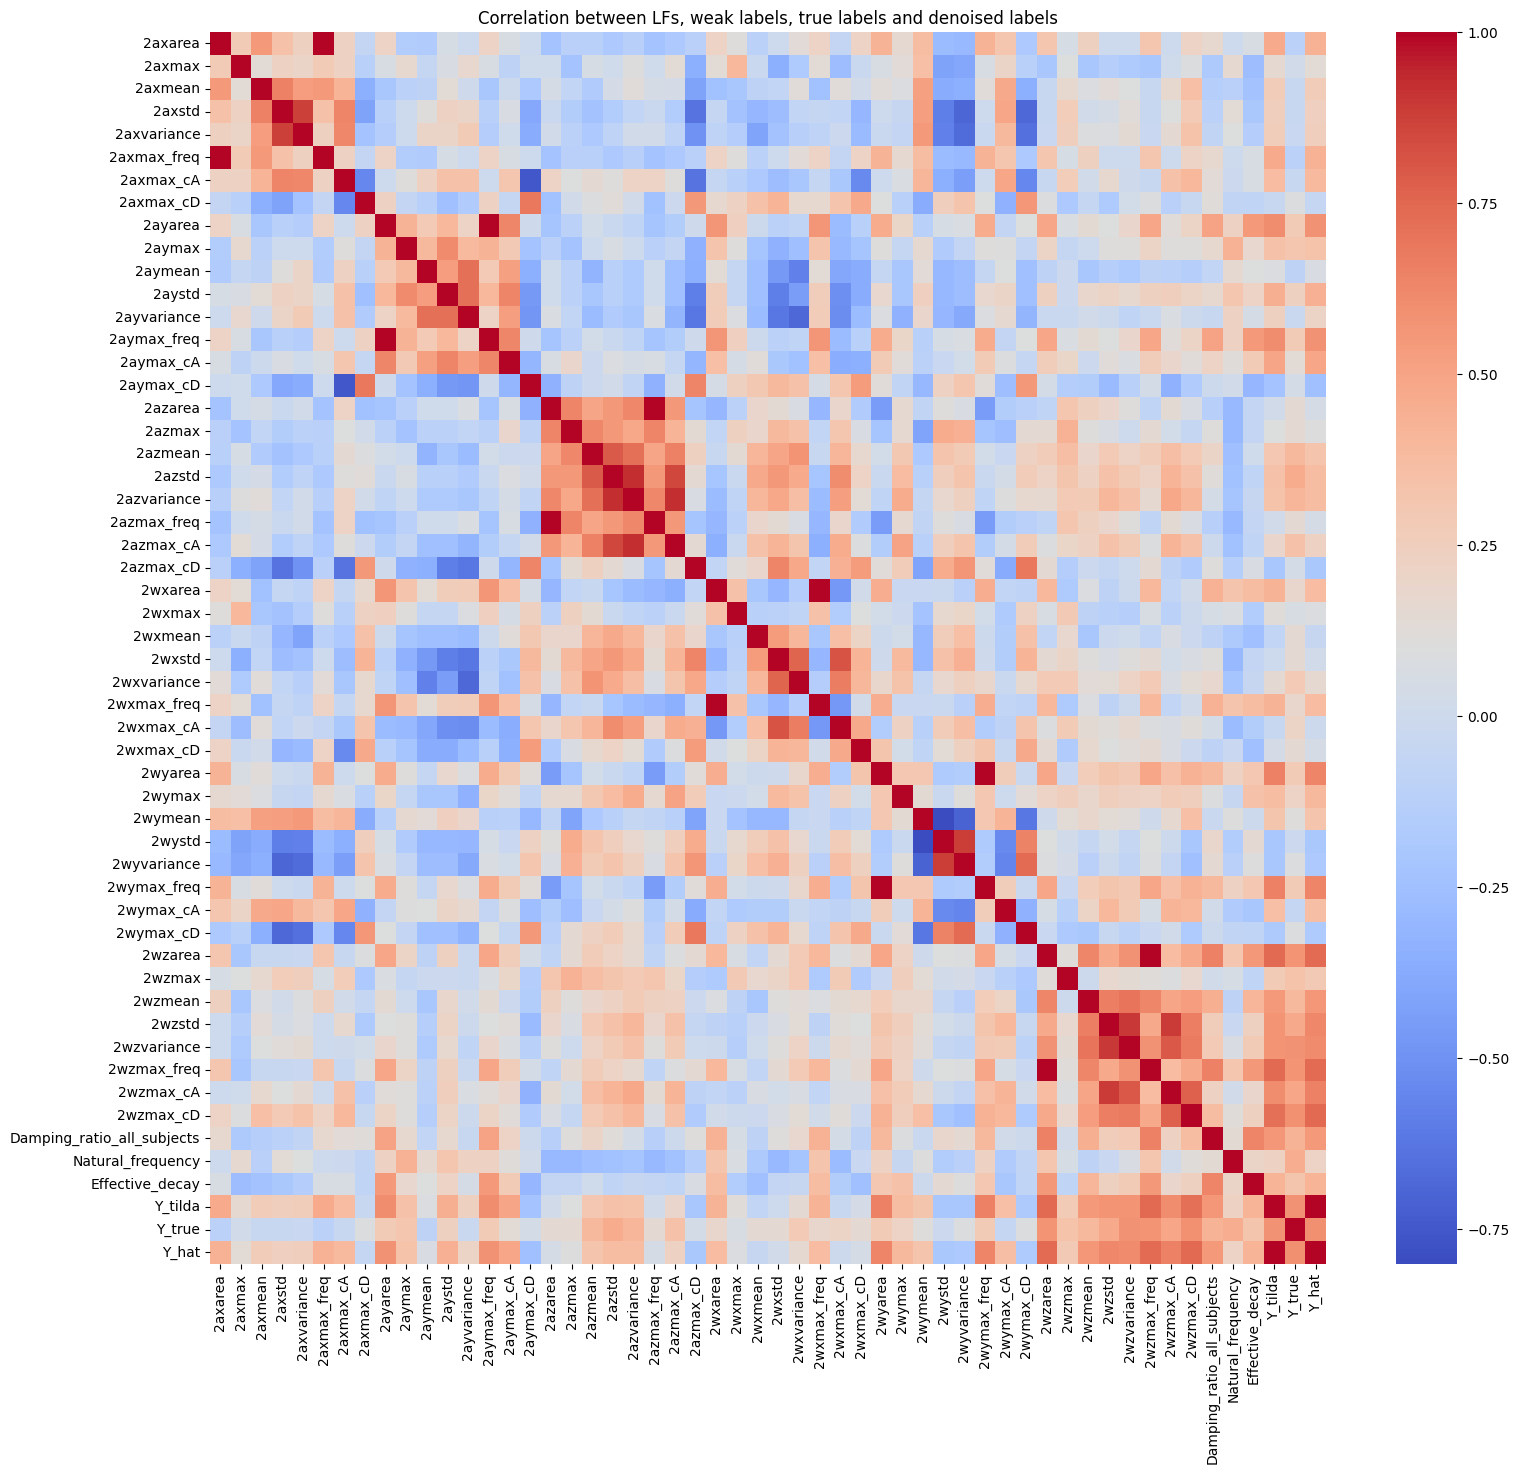

In [ ]:
corr_matrix = label_matrix.copy()
corr_matrix = np.c_[corr_matrix,data_Y,Y_true]# Y_tilda and Y_true

corr_matrix = np.c_[corr_matrix,y_pred]
column_names=combined_df.drop(columns=['subjects','Dataset']).columns.tolist()
column_names.append('Y_tilda')
column_names.append('Y_true')
column_names.append('Y_hat')

df = pd.DataFrame(corr_matrix,columns =column_names)
#df.columns = combined_df.drop(columns=['subjects','Dataset']).columns
#df.index = combined_df['subjects']
corr = df.corr()
f = plt.figure(figsize=(19, 15))

plt.figure(figsize=(18, 16))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation between LFs, weak labels, true labels and denoised labels")
plt.show()

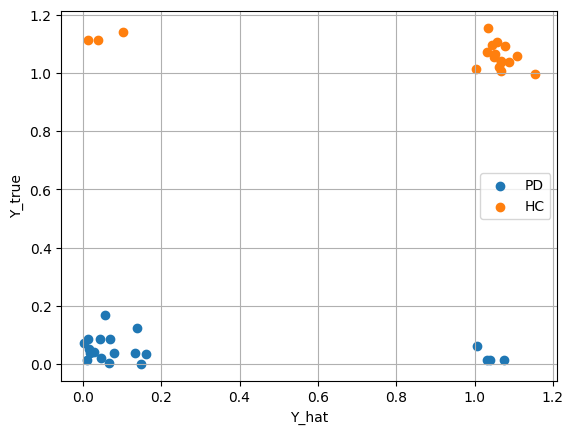

In [ ]:
# pick a sigma and mu for normal distribution
sigma = 0.05
mu = 0.05

# generate normally distributed samples
noise1 = np.abs(sigma * np.random.randn(len(Y_true[Y_true==0])) + mu)
noise12 = np.abs(sigma * np.random.randn(len(Y_true[Y_true==0])) + mu)

noise2 = np.abs(sigma * np.random.randn(len(Y_true[Y_true==1])) + mu)
noise22 = sigma * np.random.randn(len(Y_true[Y_true==1])) + mu
#plt.scatter(probs_to_preds(probs_train)[Y_true==0]+noise1,Y_true[Y_true==0]+noise12)
#plt.scatter(probs_to_preds(probs_train)[Y_true==1]+noise2,Y_true[Y_true==1]+noise22)
plt.scatter(np.transpose(np.round(y_pred[Y_true==0,:]))+noise1,Y_true[Y_true==0]+noise12)
plt.scatter(np.transpose(np.round(y_pred[Y_true==1]))+noise2,Y_true[Y_true==1]+noise22)
plt.xlabel('Y_hat')
plt.ylabel('Y_true')
plt.legend(['PD','HC'],loc='best')
plt.grid()
plt.show()

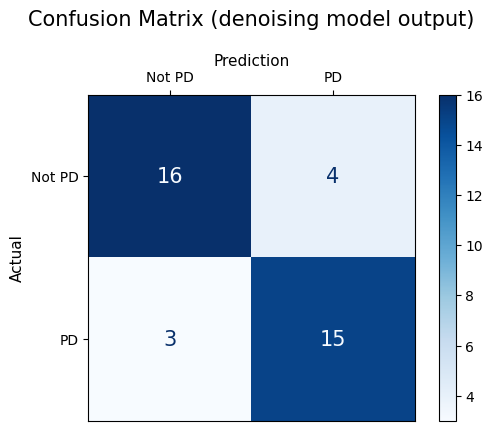

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import seaborn as sns
classes = ['Not PD', 'PD']
cm = confusion_matrix(Y_true,np.round(y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (denoising model output)', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
#Customizations
for text in disp.ax_.texts:
    text.set_fontsize(15)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
#plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)

plt.show()

[0.44736842 0.5        0.47368421 0.47368421 0.47368421 0.44736842
 0.47368421 0.55263158 0.63157895 0.65789474 0.44736842 0.60526316
 0.47368421 0.63157895 0.55263158 0.52631579 0.57894737 0.57894737
 0.68421053 0.71052632 0.68421053 0.57894737 0.65789474 0.52631579
 0.57894737 0.52631579 0.57894737 0.57894737 0.63157895 0.57894737
 0.60526316 0.57894737 0.63157895 0.60526316 0.55263158 0.5
 0.55263158 0.63157895 0.47368421 0.55263158 0.78947368 0.65789474
 0.68421053 0.73684211 0.78947368 0.78947368 0.73684211 0.78947368
 0.71052632 0.68421053 0.65789474]
[0.42105263 0.48       0.45833333 0.46153846 0.46428571 0.42105263
 0.46153846 0.55555556 0.59090909 0.63157895 0.44       0.56
 0.46666667 0.59090909 0.51851852 0.5        0.58333333 0.58333333
 0.8        0.88888889 0.875      0.58333333 0.77777778 0.5
 0.54166667 0.5        0.57142857 0.58333333 0.75       0.54166667
 0.63636364 0.57142857 0.59090909 0.57142857 0.52380952 0.46153846
 0.54545455 0.59090909 0.45       0.55555556 0.

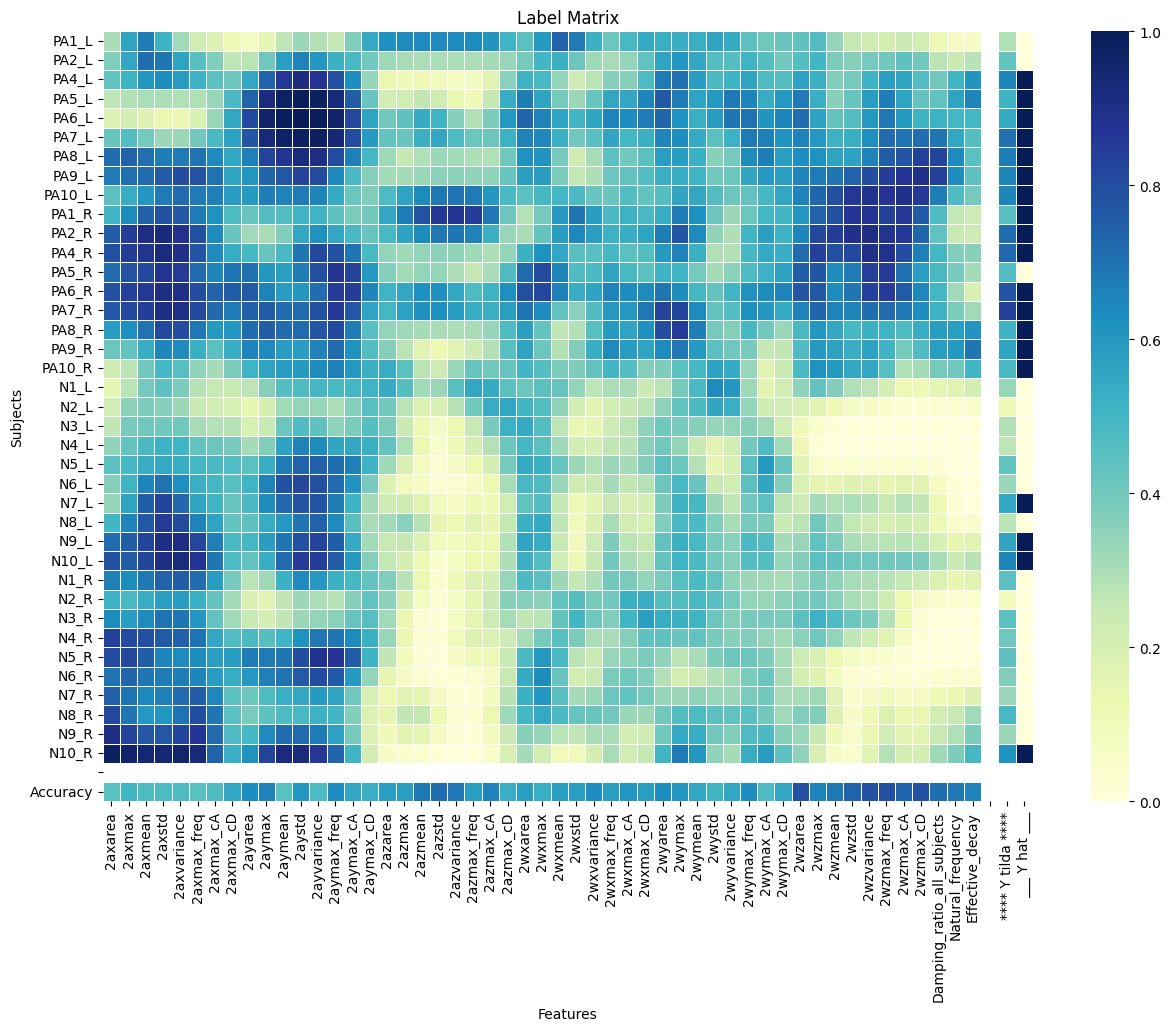

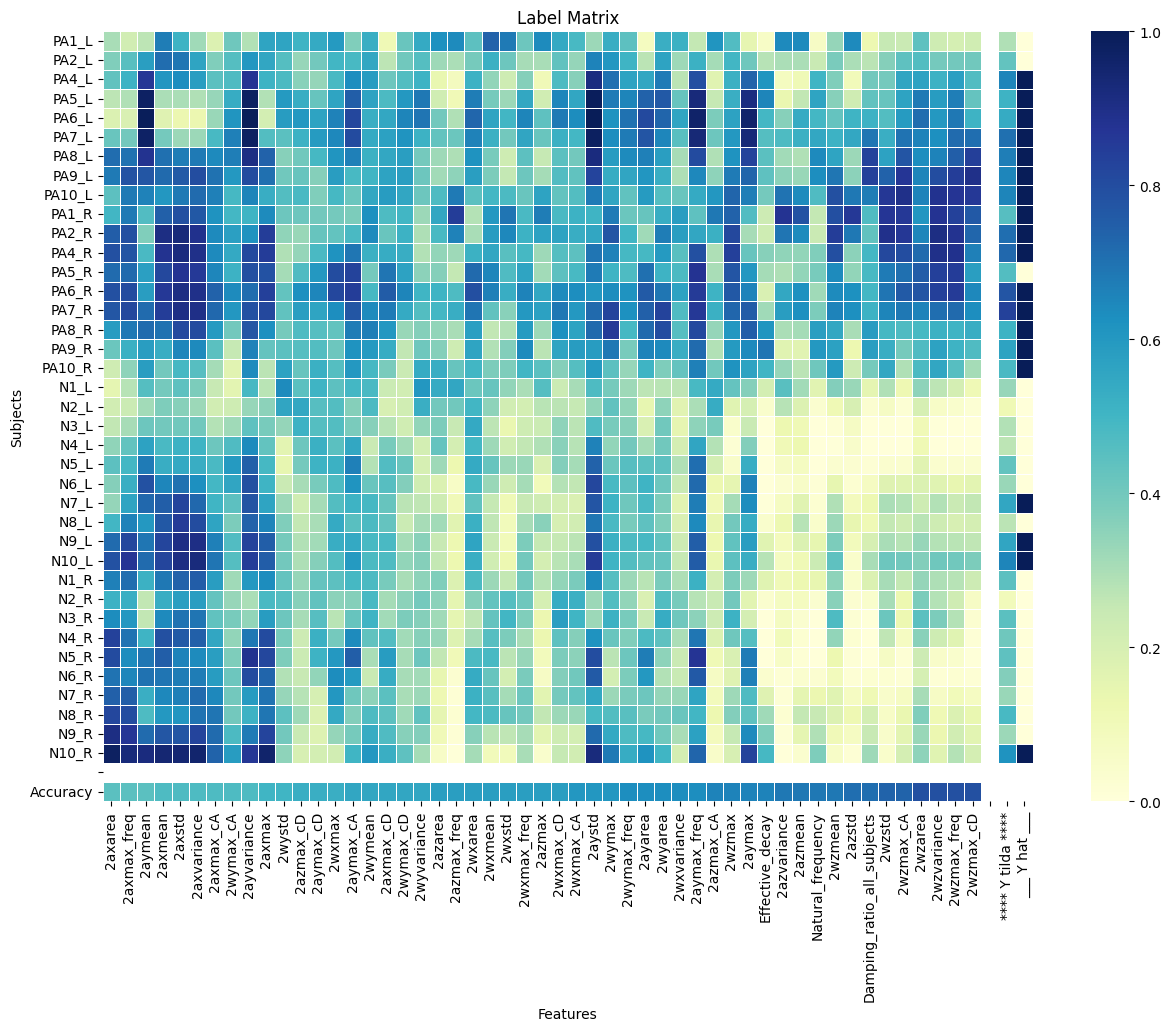

In [ ]:
from scipy.ndimage import gaussian_filter

fig, ax = plt.subplots(figsize=(15, 10))
padding = np.full((label_matrix.shape[0], 1), np.nan)
 # I picked padding cuz it destroys guassian filter
smoothed_label_matrix = gaussian_filter(label_matrix, sigma=1)
combined_matrix = np.c_[smoothed_label_matrix,padding,data_Y,np.round(y_pred)]
padding = np.full((combined_matrix.shape[1], 1), np.nan)

PD_positive = np.sum(label_matrix[0:18],axis=0)
HC_positive = np.sum(label_matrix[18:38],axis=0)
accuracy_score = (PD_positive+(20-HC_positive))/38
print(accuracy_score)
precision_score = PD_positive/(PD_positive+HC_positive)
print(precision_score)
#accuracy_score=precision_score


combined_matrix = np.r_[combined_matrix,np.transpose(padding),[np.append(accuracy_score,[np.nan,np.nan,np.nan])]] #[np.append(np.mean(label_matrix,axis=0),[np.nan,np.nan])]]

#mask = np.isnan(combined_matrix)
#sns.heatmap(gaussian_filter(np.c_[label_matrix,data_Y],sigma=1), annot=False, cmap="YlGnBu", fmt=".0f", ax=ax, xticklabels=np.r_[combined_df.drop(columns=['Dataset']).columns.values[1:],['**** Y tilda ****']], yticklabels=combined_df['subjects'],linewidths=0.5, linecolor='black')
sns.heatmap(combined_matrix, annot=False, cmap="YlGnBu", fmt=".0f", ax=ax, xticklabels=np.r_[combined_df.drop(columns=['Dataset']).columns.values[1:],[''],['**** Y tilda ****'],['___ Y hat ___']], yticklabels=np.r_[combined_df['subjects'],[''],['Accuracy']],linewidths=0.5, linecolor='white')

ax.set_title("Label Matrix")
ax.set_xlabel("Features")
ax.set_ylabel("Subjects")
plt.show()

# the new plot sorted
ind = np.argsort(accuracy_score)
fig, ax = plt.subplots(figsize=(15, 10))
xticklabels=np.r_[(combined_df.drop(columns=['Dataset']).columns.values[1:])[ind],[''],['**** Y tilda ****'],['___ Y hat ___']]
yticklabels=np.r_[combined_df['subjects'],[''],['Accuracy']]

sns.heatmap((combined_matrix[:,np.append(ind,[51,52,53])]), annot=False, cmap="YlGnBu", fmt=".0f", ax=ax, xticklabels= xticklabels, yticklabels=yticklabels,linewidths=0.5, linecolor='white')

ax.set_title("Label Matrix")
ax.set_xlabel("Features")
ax.set_ylabel("Subjects")
plt.show()

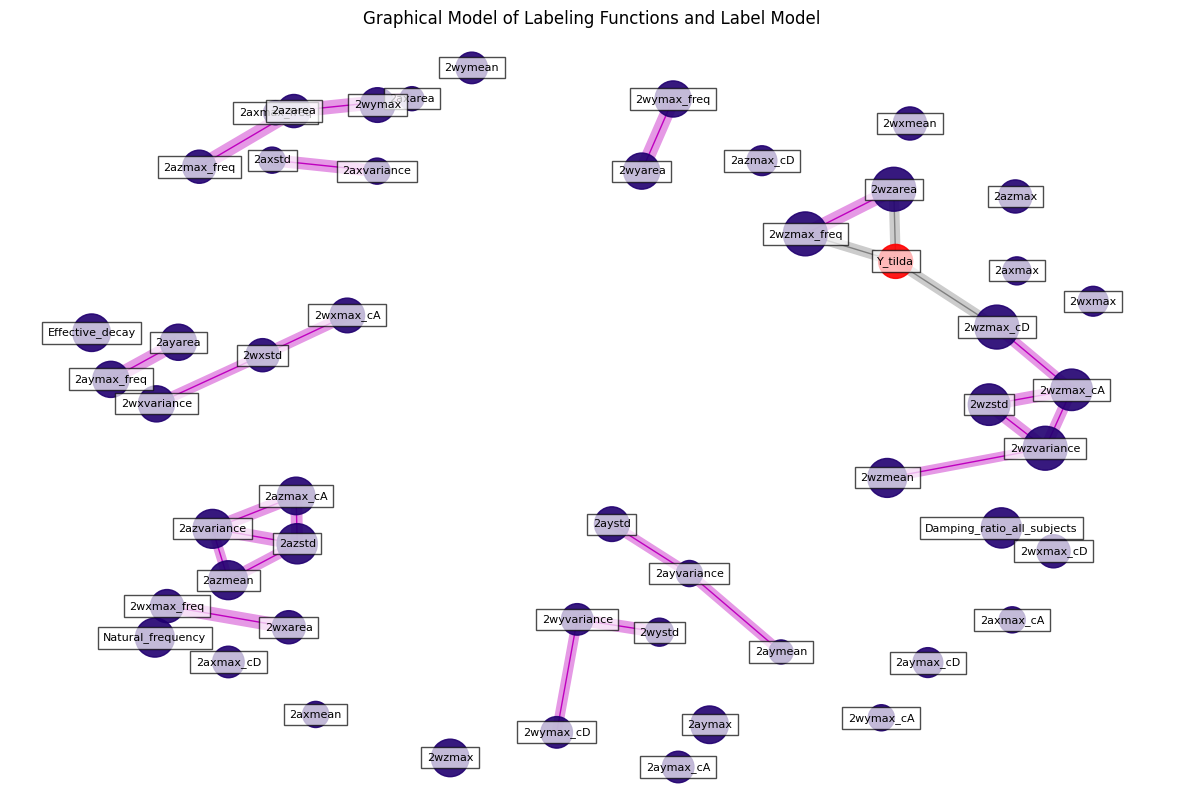

In [ ]:
import networkx as nx

PD_positive = np.sum(label_matrix[0:18],axis=0)
HC_positive = np.sum(label_matrix[18:38],axis=0)
accuracy_score = (PD_positive+(20-HC_positive))/38


graphical_model = label_matrix.copy()
graphical_model = np.c_[graphical_model,data_Y]# adding Label Model output (Y_tilda)

column_names=combined_df.drop(columns=['subjects','Dataset']).columns.tolist()
column_names.append('Y_tilda')

df = pd.DataFrame(graphical_model)#,columns =column_names)
corr = df.corr()
threshold = 0.7
adj_matrix = corr > threshold
# ******************* constructing the Graph
G = nx.Graph()
num_lfs = adj_matrix.shape[0]
# labeling Nodes
labels = {i: combined_df.drop(columns=['Dataset']).columns.values[1:][i] for i in range(num_lfs-1)}
labels[num_lfs-1] = 'Y_tilda'
G.add_nodes_from(labels.keys())
nx.set_node_attributes(G, labels, 'label')
# Adding Edges
for i in range(num_lfs):
    for j in range(i+1, num_lfs):
        if adj_matrix.loc[i, j]:
            G.add_edge(i, j,weight=corr.iloc[i, j])
# Highlight node 52 and its edges in red
node_to_highlight = 51
edge_colors = []
for edge in G.edges():
    if node_to_highlight in edge:
        edge_colors.append('gray')
    else:
        edge_colors.append('m')
node_colors = ['red' if node == node_to_highlight else '#210070' for node in G.nodes()]
# Calculate node sizes based on accuracy scores
min_size, max_size = 300, 1000  # min and max node sizes
normalized_scores = (accuracy_score - np.min(accuracy_score)) / (np.max(accuracy_score) - np.min(accuracy_score))
node_sizes = min_size + normalized_scores * (max_size - min_size)
node_sizes=np.r_[node_sizes,600] # setting data_Y node size
# *************************** visualization
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.4, iterations=50, seed=42)  # Layout for the nodes
edges = G.edges(data=True)
edge_widths=[edge[2]['weight']*10 if 'weight' in edge[2] else edge[2]['weight']*10 for edge in edges]
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
H = nx.Graph(G)
nx.draw_networkx_edges(G, pos, alpha=0.4, width=edge_widths, edge_color=edge_colors)
nx.draw_networkx_edges(G,pos, edge_color=edge_colors)
nx.draw_networkx_nodes(G, pos, alpha=0.9,node_size = node_sizes,node_color=node_colors)
nx.draw_networkx_labels(G,pos,labels=labels, font_size = 8,font_color='black', bbox=label_options)
plt.title('Graphical Model of Labeling Functions and Label Model')
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()